<a href="https://colab.research.google.com/github/Pramathesh1/Capstone-2-BikeSharingPrediction-Regression/blob/main/Bike_Sharing_Demand_Prediction_Regression_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Seoul Bike Sharing Demand Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

This regression project was conducted on the Seoul Bike Sharing dataset to predict the hourly count of bike rentals based on various features such as temperature, humidity, wind speed, and hour of the day. The project involved several steps, including preliminary data exploration and data wrangling, exploratory data analysis and data visualization, hypothesis testing, feature engineering, model implementation, and use of explainability tool.

In the first step, the dataset was explored to identify any missing or erroneous data points, and data wrangling techniques were employed to clean the dataset. Exploratory data analysis was then conducted to identify any patterns or trends in the data. The analysis revealed that the number of bike rentals was highest during rush hours, i.e., 7-9 am and 5-7 pm, and during the summer season.

Hypothesis testing was conducted to determine whether there was a significant difference in the number of bike rentals between weekdays and weekends, morning and evening and whether rainfall has any effect. The results showed that the number of bike rentals was significantly higher on weekdays than on weekends, higher in evening than morning and rainfall decreases the rental count.

In the next step, feature engineering was performed to remove redundant features, to create new features and modify existing features that would improve the predictive performance of the model. The new features included dummy variables, which represented categorical variables such as season and weather conditions. Power transformation was applied on rainfall and snowfall to make it more normal. Then the features were separated into dependent and independent variables to make easier for model implementation. Finally the data was scaled for linear regression.

Four different regression models were trained and evaluated on the dataset, namely Linear Regression, Decision Tree, Random Forest and XGBoost. The evaluation metrics used were Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared and Adjusted R-squared score. The results showed that XGBoost outperformed the other 3 models, achieving the lowest MAE, MSE, and RMSE and highest R-squared and Adjusted R-squared score.

The hyperparameters of each model were also tuned using grid search to identify the optimal hyperparameters. The XGBoost model was also tuned using grid search on hyperparameters of maximum depth, and number of estimators. The results showed that the XGBoost model achieved an Adjusted R-squared value of 0.9067, indicating that the model can explain 90.67% of the variance in the target variable. After using grid search to identify the optimal hyperparameters on XGBoost, the model's performance improved by a very small margin. However, the tuning process was found to be time-consuming and computationally expensive. So its upto the user to use the regular XGBoost or tuned XGBoost as both have almost similar performance.

To gain insights into the factors that influenced bike rentals, feature importance analysis was conducted using the SHapley Additive exPlanations (SHAP) method. The analysis revealed that temperature was the most important feature in predicting bike rentals, followed by humidity, Solar Radiation, and whether the hour was a 6PM or not. The SHAP values for temperature showed a positive correlation, indicating that as the temperature increases, the number of bike rentals also increases.

In conclusion, this project demonstrates the effectiveness of machine learning techniques in analyzing and predicting complex systems such as bike sharing networks. The XGBoost model outperformed other models, and temperature was identified as the most important feature for accurate predictions. The findings of this project can be used to optimize bike sharing systems in urban areas by providing insights into the factors that influence bike rentals. Overall, this project highlights the importance of data preprocessing, feature engineering, and explainability tools in developing accurate and interpretable machine learning models.


# **GitHub Link -**

https://github.com/Pramathesh1/Capstone-2-BikeSharingPrediction-Regression.git

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 8.2 MB/s eta 0:00:00


In [ ]:
# importing relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance
from scipy import stats
from statsmodels.stats.weightstats import ztest
import shap

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the data into pandas dataframe
file_location = '/content/drive/MyDrive/Colab Notebooks/Almabetter/Regression Capstone Project/Copy of SeoulBikeData.csv'
df = pd.read_csv(file_location, encoding='latin-1')

### Dataset First View

In [ ]:
# printing the dataset
df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

### Dataset Rows & Columns count

In [ ]:
# dataset dimensions
df.shape

(8760, 14)

### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

We see the data type of the variables. We note here that the date variable is string type.

#### Duplicate Values

In [ ]:
df.duplicated().sum()

0

No duplicate rows found so we proceed.

#### Checking Null values

In [ ]:
# checking null values in each column
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

The dataset has no null values in any column.

### What did you know about your dataset?

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information for every hour of each day of a year. The target variable is the rented bike count which is dependent on the weather conditions and the time and date. 

It has 14 columns and 8760 rows. 8760 rows mean we have data for 365 days, from 1 December 2017 to 30 November 2018, for every hour in a day as 365*24 = 8760.  There are no mising values and duplicate values in the dataset. 

## ***2. Understanding Your Variables***

In [ ]:
# getting statistical info on the columns
df.describe(include = 'all')

Date  Rented Bike Count         Hour  Temperature(°C)  \
count         8760        8760.000000  8760.000000      8760.000000   
unique         365                NaN          NaN              NaN   
top     01/12/2017                NaN          NaN              NaN   
freq            24                NaN          NaN              NaN   
mean           NaN         704.602055    11.500000        12.882922   
std            NaN         644.997468     6.922582        11.944825   
min            NaN           0.000000     0.000000       -17.800000   
25%            NaN         191.000000     5.750000         3.500000   
50%            NaN         504.500000    11.500000        13.700000   
75%            NaN        1065.250000    17.250000        22.500000   
max            NaN        3556.000000    23.000000        39.400000   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count   8760.000000       8760.000000       8760.000000   
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
std       20.362413          1.036300        608.298712   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
std                     13.060369                 0.868746      1.128193   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN

### Variables Description 

* #### Date - date of the record in format year-month-day
* #### Rented Bike count - Count of bikes rented at each hour
* #### Hour - Hour of the day
* #### Temperature-Temperature in Celsius
* #### Humidity -in %
* #### Windspeed - in m/s
* #### Visibility - in 10m`
* #### Dew point temperature - in Celsius
* #### Solar radiation - in MJ/m2
* #### Rainfall - in mm
* #### Snowfall - in cm
* #### Seasons - Winter, Spring, Summer, Autumn
* #### Holiday - Was it a holiday on that day (Holiday/No holiday)
* #### Functional Day - Whether bikes were available for rent on that day(NoFunc(Non Functional Hours), Fun(Functional hours))

### Check Unique Values for each variable.

In [ ]:
# print all columns in the dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  Date is 365 .
No. of unique values in  Rented Bike Count is 2166 .
No. of unique values in  Hour is 24 .
No. of unique values in  Temperature(°C) is 546 .
No. of unique values in  Humidity(%) is 90 .
No. of unique values in  Wind speed (m/s) is 65 .
No. of unique values in  Visibility (10m) is 1789 .
No. of unique values in  Dew point temperature(°C) is 556 .
No. of unique values in  Solar Radiation (MJ/m2) is 345 .
No. of unique values in  Rainfall(mm) is 61 .
No. of unique values in  Snowfall (cm) is 51 .
No. of unique values in  Seasons is 4 .
No. of unique values in  Holiday is 2 .
No. of unique values in  Functioning Day is 2 .


## ***3. Data Wrangling***

### Extracting Month and Day of the week from Date column

As noted before, Date column has string datatype. So we convert that to datetime object using pandas datetime module.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

Date variable is converted to datetime object. We can extract month and day from a particular date.

In [ ]:
df['Date'][1].month_name()

'December'

In [ ]:
df['Date'][1].day_name()

'Friday'

In [ ]:
df['Date'][1]

Timestamp('2017-12-01 00:00:00')

Creating Month and Day of the week columns from Date variable.

In [ ]:
df['Month'] = df['Date'].apply(lambda x: x.month_name())
df['Day of Week'] = df['Date'].apply(lambda x: x.day_name())

In [ ]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day     Month Day of Week  
0             Yes  December      Friday  
1             Yes  December      Friday  
2             Yes  December      Friday  
3             Yes  December      Friday  
4             Yes  December      Friday

### Removing Non Functioning days

The "Functioning Day" column gives the info whether the rental service was available for that day. The rows that have the value "No" for that column means the rental service was unavailable and so the Rented Bike Count is 0 for all those rows. So we remove those rows (295 in number) as these don't give the absolute picture of other features affecting the output and so may negatively affect model predictions.`

In [ ]:
# data on non functioning day
df[df['Functioning Day'] == 'No']

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
3144 2018-04-11                  0     0             14.4           82   
3145 2018-04-11                  0     1             13.6           81   
3146 2018-04-11                  0     2             12.7           80   
3147 2018-04-11                  0     3             11.6           81   
3148 2018-04-11                  0     4             10.2           83   
...         ...                ...   ...              ...          ...   
8251 2018-11-09                  0    19             11.9           71   
8252 2018-11-09                  0    20             11.9           72   
8253 2018-11-09                  0    21             11.4           74   
8254 2018-11-09                  0    22             11.2           75   
8255 2018-11-09                  0    23             10.9           76   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
3144               4.6              1041                       11.3   
3145               3.6               886                       10.3   
3146               3.9               885                        9.3   
3147               3.1               687                        8.4   
3148               3.5               554                        7.4   
...                ...               ...                        ...   
8251               2.7               589                        6.7   
8252               2.5               526                        7.0   
8253               1.9               498                        6.9   
8254               1.7               478                        6.9   
8255               1.2               456                        6.8   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
3144                      0.0           0.0            0.0  Spring   
3145                      0.0           0.0            0.0  Spring   
3146                      0.0           0.0            0.0  Spring   
3147                      0.0           0.0            0.0  Spring   
3148                      0.0           0.0            0.0  Spring   
...                       ...           ...            ...     ...   
8251                      0.0           0.0            0.0  Autumn   
8252                      0.0           0.0            0.0  Autumn   
8253                      0.0           0.0            0.0  Autumn   
8254                      0.0           0.0            0.0  Autumn   
8255                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day     Month Day of Week  
3144  No Holiday              No     April   Wednesday  
3145  No Holiday              No     April   Wednesday  
3146  No Holiday              No     April   Wednesday  
3147  No Holiday              No     April   Wednesday  
3148  No Holiday              No     April   Wednesday  
...          ...             ...       ...         ...  
8251  No Holiday              No  November      Friday  
8252  No Holiday              No  November      Friday  
8253  No Holiday              No  November      Friday  
8254  No Holiday              No  November      Friday  
8255  No Holiday              No  November      Friday  

[295 rows x 16 columns]

In [ ]:
# Sum of bikes rented when on non functioning days
df[df['Functioning Day'] == 'No']['Rented Bike Count'].sum()

0

In [ ]:
df.drop(df[df['Functioning Day'] == 'No'].index, inplace = True)
df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0    2017-12-01                254     0             -5.2           37   
1    2017-12-01                204     1             -5.5           38   
2    2017-12-01                173     2             -6.0           39   
3    2017-12-01                107     3             -6.2           40   
4    2017-12-01                 78     4             -6.0           36   
...         ...                ...   ...              ...          ...   
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day     Month Day of Week  
0     No Holiday             Yes  December      Friday  
1     No Holiday             Yes  December      Friday  
2     No Holiday             Yes  December      Friday  
3     No Holiday             Yes  December      Friday  
4     No Holiday             Yes  December      Friday  
...          ...             ...       ...         ...  
8755  No Holiday             Yes  November      Friday  
8756  No Holiday             Yes  November      Friday  
8757  No Holiday             Yes  November      Friday  
8758  No Holiday             Yes  November      Friday  
8759  No Holiday             Yes  November      Friday  

[8465 rows x 16 columns]

In [ ]:
df['Functioning Day'].unique()

array(['Yes'], dtype=object)

Now the dataframe is free from non functioning days. We can also see the number of rows has reduced from 8760 to 8465.

### What all manipulations have you done and insights you found?

The dataset had date in the format of dd-mm-yyyy. We created a month column and a day of the week column so that we can analyze the pattern of rental bike counts over the year based on months and over the week based on the days of the week. Further we had records of non-functioning days where there was no record of any bookings and so these records were removed. Now the dataset is ready for analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In this section, we visualize the data and explore the variables before going for model building.

### Chart 1 - Distribution of Holidays

In [ ]:
df['Holiday'].value_counts()

No Holiday    8057
Holiday        408
Name: Holiday, dtype: int64

<Axes: ylabel='Holiday'>

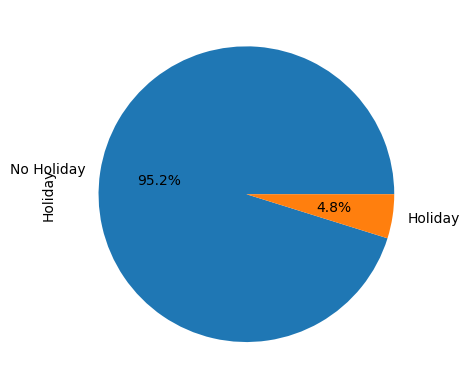

In [ ]:
df['Holiday'].value_counts().plot(kind = 'pie',autopct="%1.1f%%")

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Here, we plot the categorical variable of Holiday column to see how many days were holidays in the year.

##### 2. What is/are the insight(s) found from the chart?

In a year, around 17 Holidays are present (excluding Sundays) and rest all are non-holidays. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company can focus more on rental bike count trend on non-holidays as holidays are very less in number.

### Chart 2 - Boxplots for Numeric variables

In [ ]:
numeric_cols = np.array(df.describe().columns)

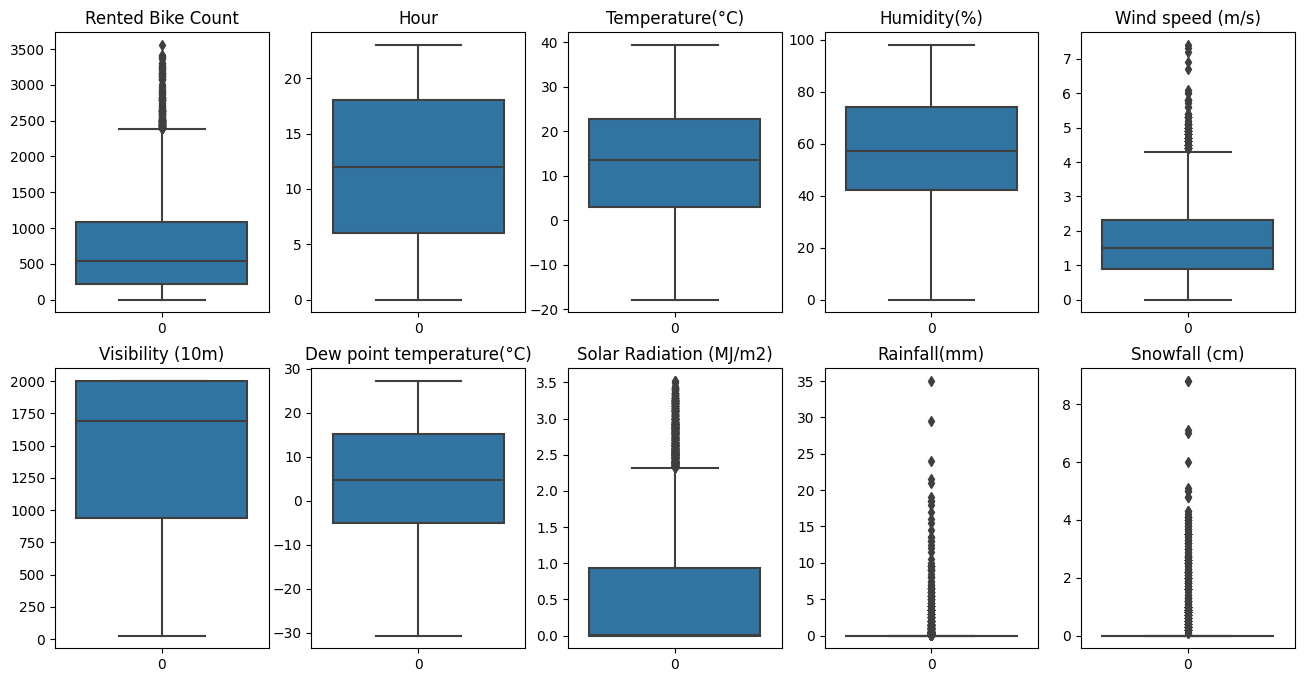

In [ ]:
# Checking for Outliers using Box Plots
n=1
plt.figure(figsize=(16,8))
for col in numeric_cols:
  feature = df[col]
  ax = plt.subplot(2,5,n)
  ax.set_title(col)
  sns.boxplot(feature)
  n+=1
plt.show()

Text(0.5, 0, 'Rented Bike Count')

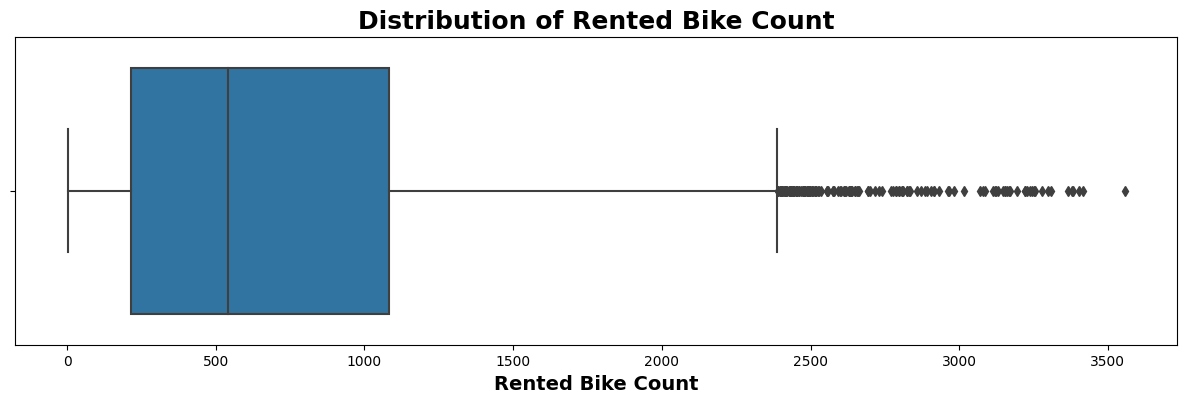

In [ ]:
# plotting boxplot rental bike count
plt.figure(figsize = (15,4))
sns.boxplot(data = df,  x ='Rented Bike Count')
plt.title('Distribution of Rented Bike Count',fontsize = 18, fontweight='bold')
plt.xlabel('Rented Bike Count', fontsize = 14, fontweight='bold')

##### 1. Why did you pick the specific chart?

A Box and Whisker Plot (or Box Plot) is a convenient way of visually displaying the data distribution through their quartiles. It is a graphical rendition of statistical data based on the minimum, first quartile, median, third quartile, and maximum. A box plot allows a graphical display of the distribution of variable.

Further any results of data that fall outside of the minimum and maximum values are known as outliers are easy to determine on a box plot graph.

##### 2. What is/are the insight(s) found from the chart?

From the box plot, we can see the outliers in the rental bike count, wind speed and solar radiations. Rainfall and Snowfall variable have their median as 0 and many outliers can be seen, which means throughout the year, there are very less number of days where rain and snow occured.

The distribution of rental bike count remains mostly between 500 and 1000, but it also reaches 3500 which can be termed as outliers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Box plot is helpful in visualizing distribution of numeric data. Distribution of independent variables can tell what we can expect in the future. Here, rainfall and snowfall mostly remain at zero, temperature mostly stays below 30°C, Humidity mostly stays between 40% to 80%, Wind speed mostly remains around 2m/s but it can go more than 7m/s also, solar radiation can reach 3.5 MJ/m2. Knowing these distributions will help the business to set up its infrastructure accordingly and be prepared for these weather conditions.

### Chart 3 - Density plot for Numeric variables

In [ ]:
# to extract the numeric features in dataset
numeric_features = list(df.describe().columns)
numeric_features

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

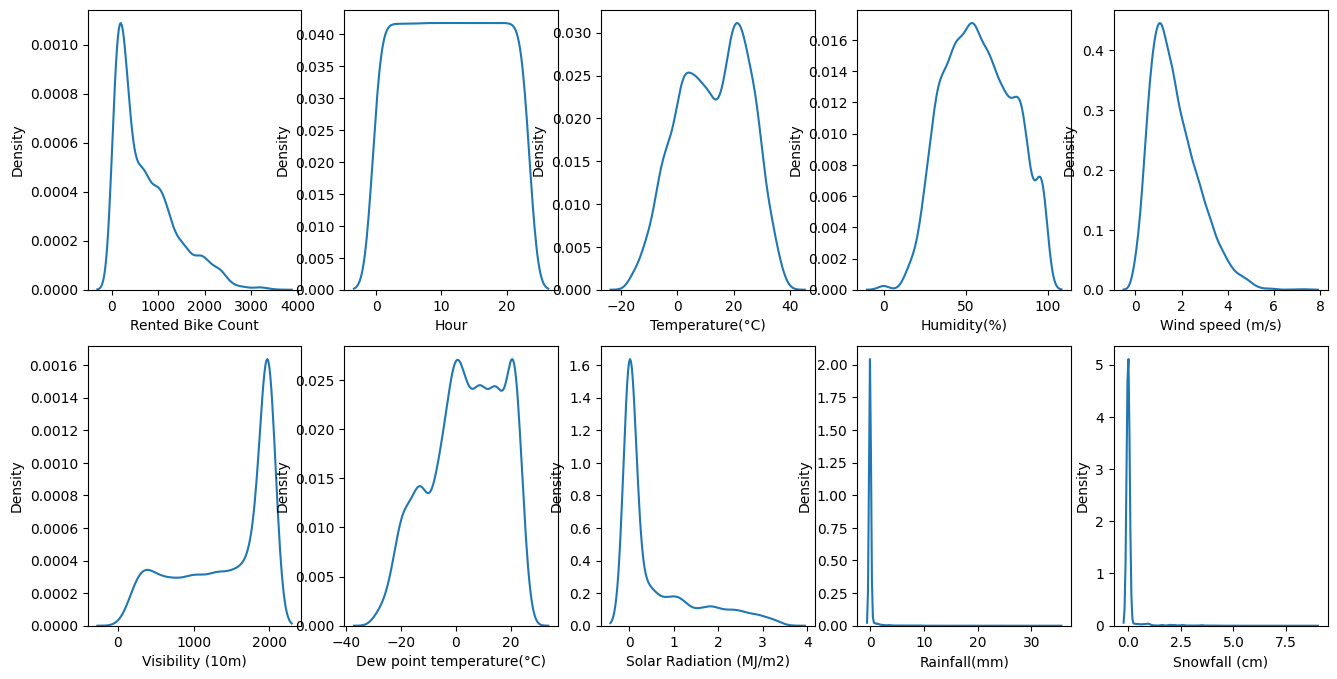

In [ ]:
# loop to plot for all numeric features
n=1
plt.figure(figsize=(16,8))
for col in numeric_features:
  feature = df[col]
  ax = plt.subplot(2,5,n)
  sns.kdeplot(data = df, x = col)
  n+=1
plt.show()

##### 1. Why did you pick the specific chart?

Density plots are used to observe the distribution of a variable in a dataset. It plots the graph on a continuous interval. The peaks of a Density Plot help display where values are concentrated over the interval.

This is useful for univariate analysis of numeric variables. So we use this plot to see the distribution of numeric variables (most of which are weather data). 

##### 2. What is/are the insight(s) found from the chart?

The information on the distribution was also gained from box plot previously. Rented bike count distribution staying mostly below 1000, wind speed around 2 m/s, rainfall and snowfall around 0, humidaity around 50%,etc.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Just like information gained from box plot, this plot also tells about the weather conditions.

### Chart 4 - Rented Bike Count vs Hour of the day

Plotting the average count of bikes rented during the time of the day.

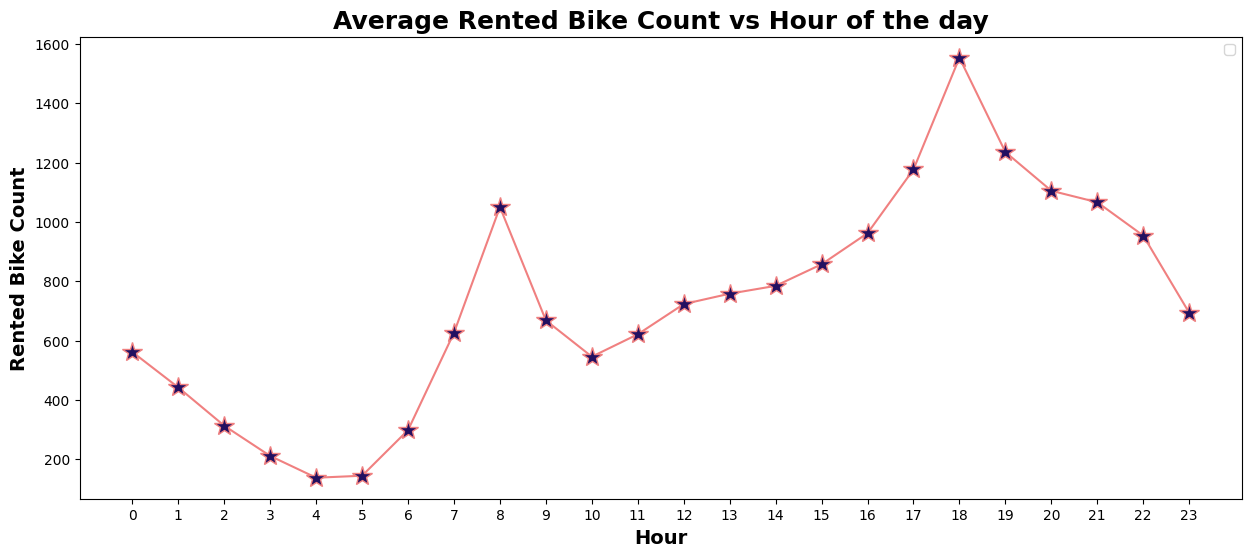

In [ ]:
# grouping by hour of the day and finding the average count per hour
df.groupby(['Hour']).mean()[['Rented Bike Count']].plot(figsize = (15,6), color = 'lightcoral', marker = '*', ms= 15, mfc = '#231061')
# modifying the plot by adding title, labels, xticks, legend
plt.title('Average Rented Bike Count vs Hour of the day',fontsize = 18, fontweight='bold')
plt.xlabel('Hour', fontsize = 14, fontweight='bold')
plt.ylabel('Rented Bike Count', fontsize = 14, fontweight='bold')
plt.xticks(np.arange(0,24,1))
plt.legend([])
plt.show()

##### 1. Why did you pick the specific chart?

Line graphs (or line charts) are used to show how the value of something changes over time, or compare how several things change over time relative to each other. So we use line plot to show the average rental bike count over the 24 hours of a day i.e. we plot the average count of bikes rented in a particular 1 hour period.

##### 2. What is/are the insight(s) found from the chart?

There are two peaks in the graph. One is in the morning between 7AM to 9AM and another one is in the evening between 5PM and 8PM. This implies usage of rental bikes increases during the office opening and closing hours. Evenings have higher count as compared to any other time of the day. As night falls, the usage decreases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Using the above plot, one can know that the company has to make sure of high availability of bikes in the morning and evening hours. If bikes are not available to customers during the office hours when there is no room for delay, it can negatively affect the company's reputation. When the demand is low in the afternoon or late night, the company can leverage the time for maintenance of bikes.

### Chart 5 - Rented Bike Count vs Holiday

Text(0, 0.5, 'Rented Bike Count')

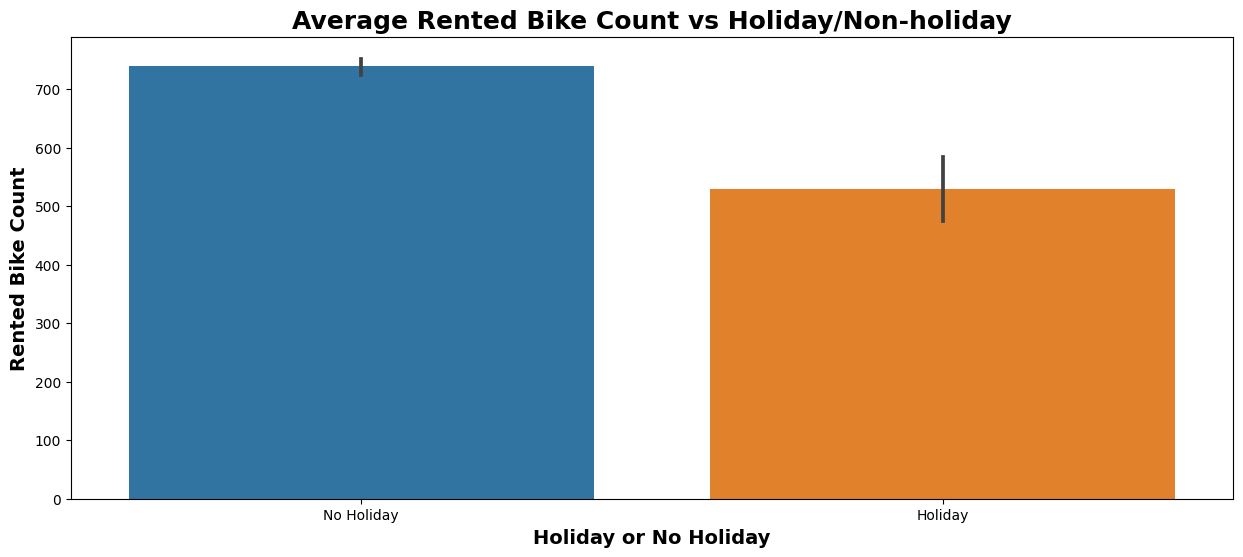

In [ ]:
# plotting the rental bike count for holiday and non-holiday
plt.figure(figsize = (15,6))
sns.barplot(data = df, x = 'Holiday', y ='Rented Bike Count')
plt.title('Average Rented Bike Count vs Holiday/Non-holiday',fontsize = 18, fontweight='bold')
plt.xlabel('Holiday or No Holiday', fontsize = 14, fontweight='bold')
plt.ylabel('Rented Bike Count', fontsize = 14, fontweight='bold')

Text(0, 0.5, 'Rented Bike Count')

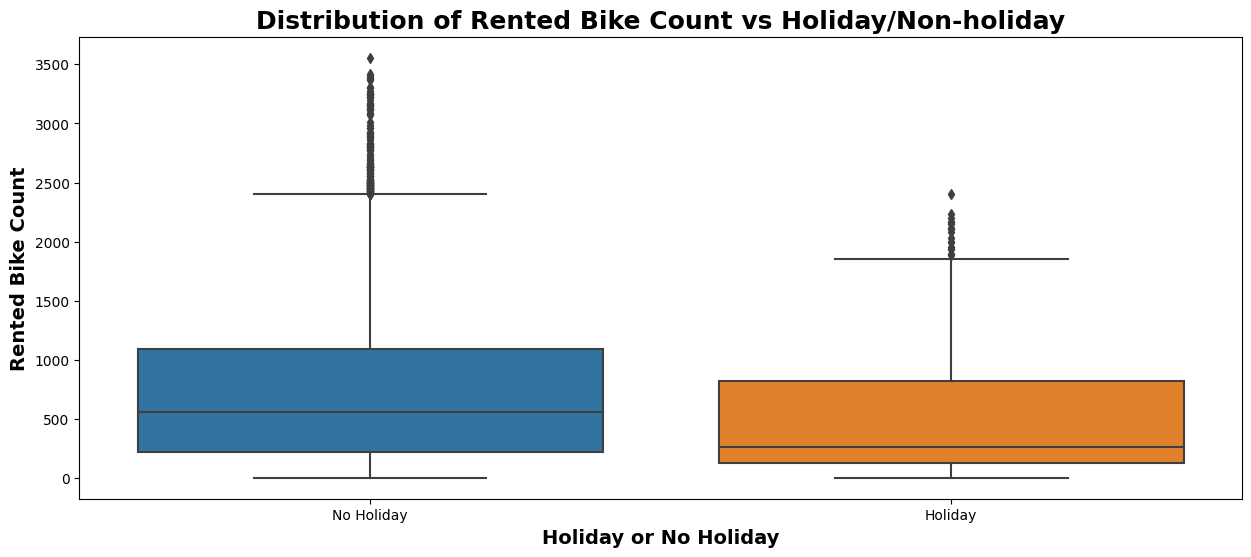

In [ ]:
# plotting boxplot rental bike count for holiday and non-holiday
plt.figure(figsize = (15,6))
sns.boxplot(data = df, x = 'Holiday', y ='Rented Bike Count')
plt.title('Distribution of Rented Bike Count vs Holiday/Non-holiday',fontsize = 18, fontweight='bold')
plt.xlabel('Holiday or No Holiday', fontsize = 14, fontweight='bold')
plt.ylabel('Rented Bike Count', fontsize = 14, fontweight='bold')

##### 1. Why did you pick the specific chart?

Bar charts are used to show segments of information. Vertical bar charts are useful to compare different categorical or discrete variables, such as age groups, classes, etc., as long as there are not too many categories to compare. Here we use bar plot to see the average bike rental count on a day if its a holiday or not a holiday. We also see the distribution using the box plot on holidays and non-holidays.

##### 2. What is/are the insight(s) found from the chart?

The rental bike count on non-holidays or working days is more than that on holidays. Rental bikes are more often used for commuting to office than for personal use. Previously too, we concluded that most bikes are used during the office hours and here we saw that bikes are used more on office days. However, the difference is not much, around 200. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Even though the demand on working days is higher than on holidays, the company needs to ensure availability on both days as the difference is not much.

### Chart 6 - Rented Bike Count vs Day of the Week

Text(0, 0.5, 'Rented Bike Count')

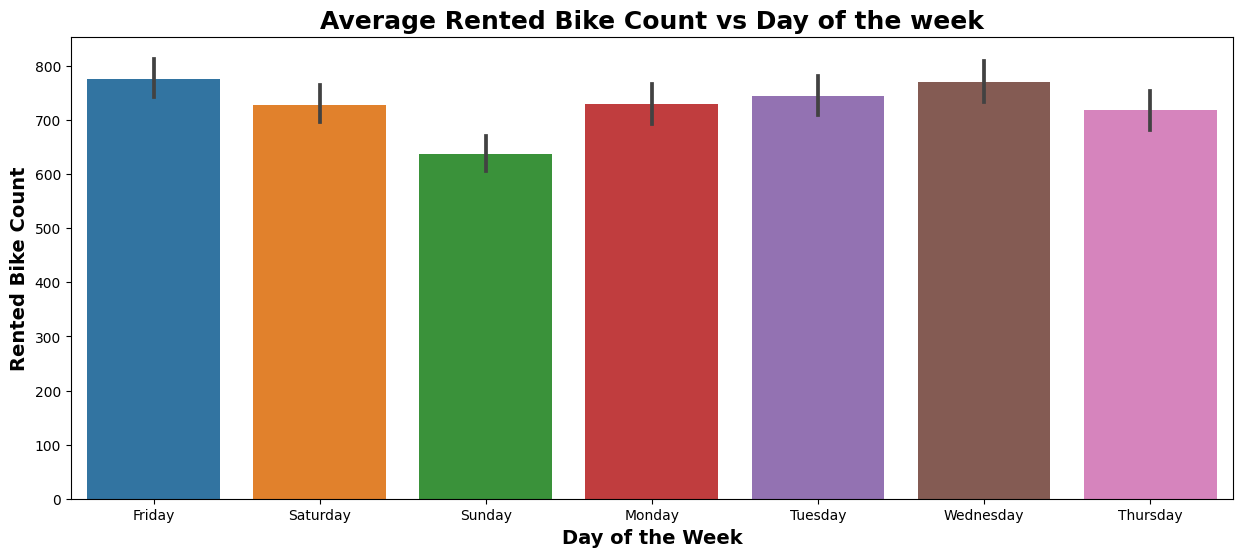

In [ ]:
# plotting average rented bike count per day of the week
plt.figure(figsize = (15,6))
sns.barplot(data = df, x = 'Day of Week', y ='Rented Bike Count')
plt.title('Average Rented Bike Count vs Day of the week',fontsize = 18, fontweight='bold')
plt.xlabel('Day of the Week', fontsize = 14, fontweight='bold')
plt.ylabel('Rented Bike Count', fontsize = 14, fontweight='bold')

Text(0, 0.5, 'Rented Bike Count')

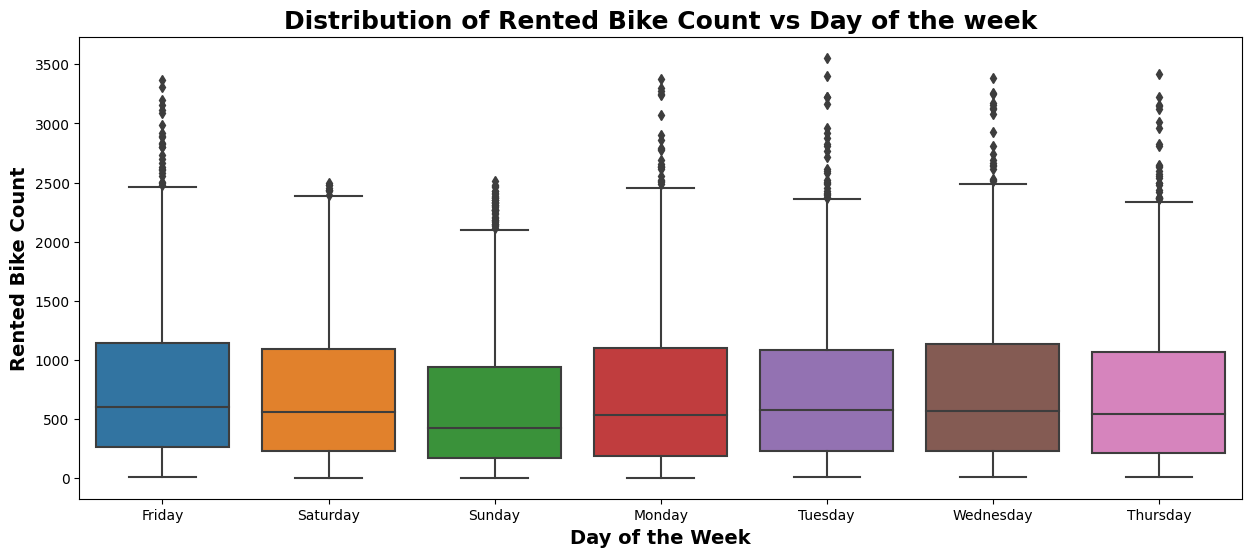

In [ ]:
# plotting boxplot for average rented bike count per day of the week
plt.figure(figsize = (15,6))
sns.boxplot(data = df, x = 'Day of Week', y ='Rented Bike Count')
plt.title('Distribution of Rented Bike Count vs Day of the week',fontsize = 18, fontweight='bold')
plt.xlabel('Day of the Week', fontsize = 14, fontweight='bold')
plt.ylabel('Rented Bike Count', fontsize = 14, fontweight='bold')

##### 1. Why did you pick the specific chart?

Bar plot and box plot here is used to find the average count of rental bikes and the distribution over the days of the week.

##### 2. What is/are the insight(s) found from the chart?

The rental bike count is relatively lower on Sunday which is a holiday, which was also evident from the previous graph. All other weekdays has comparable numbers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Nothing much is useful for the company as all the days have comparable numbers.

### Chart 7 - Rented Bike Count vs Seasons

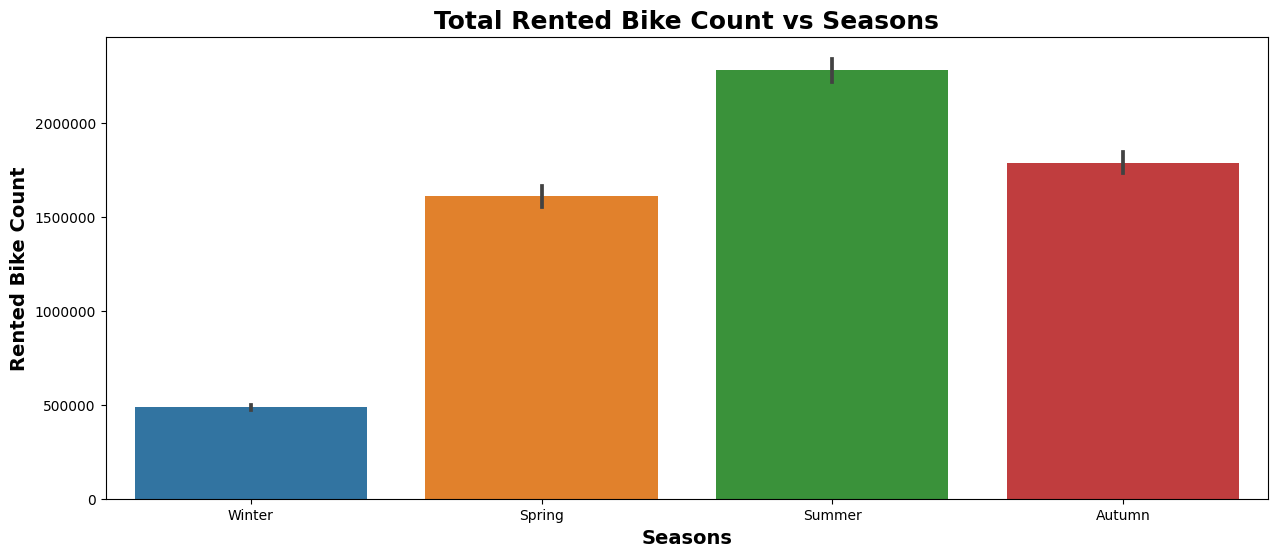

In [ ]:
# plotting average rented bike count per season
plt.figure(figsize = (15,6))
sns.barplot(data = df, x = 'Seasons', y ='Rented Bike Count', estimator = sum)
plt.title('Total Rented Bike Count vs Seasons',fontsize = 18, fontweight='bold')
plt.xlabel('Seasons', fontsize = 14, fontweight='bold')
plt.ylabel('Rented Bike Count', fontsize = 14, fontweight='bold')
plt.ticklabel_format(style='plain', axis='y')

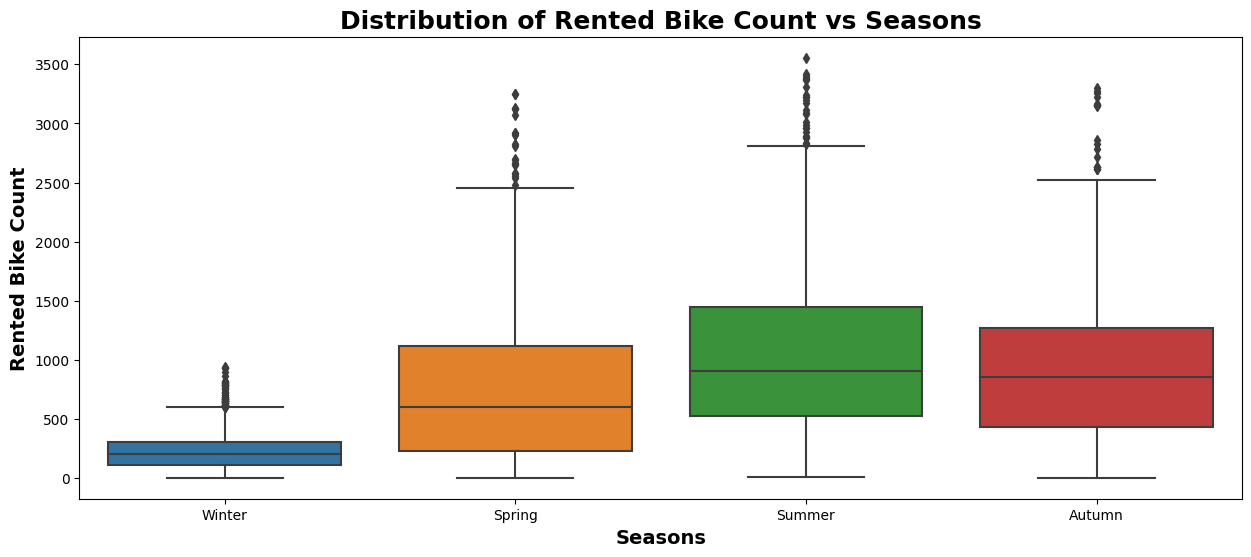

In [ ]:
# plotting boxplot for average rented bike count per season
plt.figure(figsize = (15,6))
sns.boxplot(data = df, x = 'Seasons', y ='Rented Bike Count')
plt.title('Distribution of Rented Bike Count vs Seasons',fontsize = 18, fontweight='bold')
plt.xlabel('Seasons', fontsize = 14, fontweight='bold')
plt.ylabel('Rented Bike Count', fontsize = 14, fontweight='bold')
plt.ticklabel_format(style='plain', axis='y')

##### 1. Why did you pick the specific chart?

Bar and box plots used to visualize the data over the 4 seasons to see the effect of seasons on rental bike count.

##### 2. What is/are the insight(s) found from the chart?

Summer season has seen most number of bikes rented. Spring and Autumn also have fair count, however the number is very low for Winter. Seoul has a frosty winter and so people refrain from using bike during Winter.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

On one hand, the company needs to ramp up its availability in the summer as demand is high at that time, it can use the winters for the yearly maintenance of the bikes. At the same time, it can promote the business by discounts or longer period rentals even though thats unlikely as people won't use bikes in chilly winter.

### Chart 8 - Rented Bike Count vs Month of the year

In [ ]:
# importing categorical datatype
from pandas.api.types import CategoricalDtype
cat_month = CategoricalDtype(['January','February','March','April','May','June','July','August'
            ,'September','October','November','December'],ordered=True,)

In [ ]:
# converting the month column into categorical type to order it from January to December
temp_df = df.groupby(['Month']).sum()[['Rented Bike Count']].reset_index()
temp_df['Month'] = temp_df['Month'].astype(cat_month)

In [ ]:
# calculating sum of rental bike count per month
temp_df = temp_df.sort_values('Month').set_index('Month')
temp_df

Rented Bike Count
Month                       
January               150006
February              151833
March                 380594
April                 524227
May                   707088
June                  896887
July                  734460
August                651887
September             673612
October               650675
November              465715
December              185330

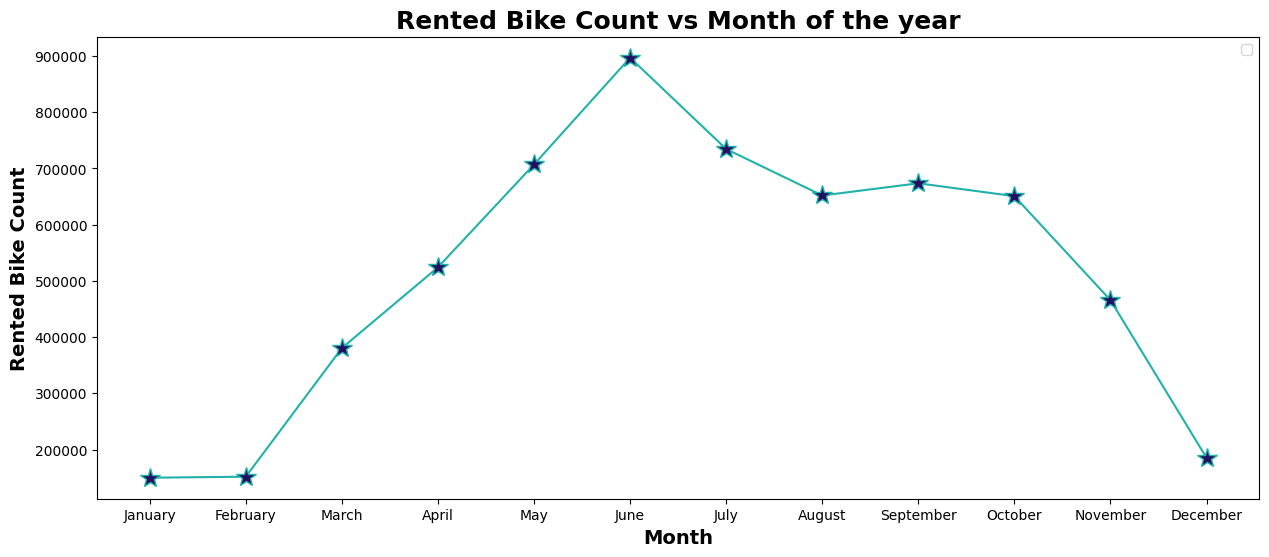

In [ ]:
# plotting rental bike count per month
temp_df.plot(figsize = (15,6), color = 'lightseagreen', marker = '*', ms= 15, mfc = '#231061')
# modifying the plot by adding title, labels, xticks, legend
plt.title('Rented Bike Count vs Month of the year',fontsize = 18, fontweight='bold')
plt.xlabel('Month', fontsize = 14, fontweight='bold')
plt.ylabel('Rented Bike Count', fontsize = 14, fontweight='bold')
plt.xticks(range(0,len(temp_df.index)), temp_df.index)
plt.legend([])
plt.show()

##### 1. Why did you pick the specific chart?

We use line plot here to show the distribution of rental bike count over the months of the year.

##### 2. What is/are the insight(s) found from the chart?

December, January and February have the lowest count of rental bikes which was also evident from the previous plot where Winter season had the lowest count. June sees the maximum rental count which falls in Summer season.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company can plan its yearly strategy with the help of the yearly rental demand plot.

### Chart 9 - Regplot

In [ ]:
from google.colab import files

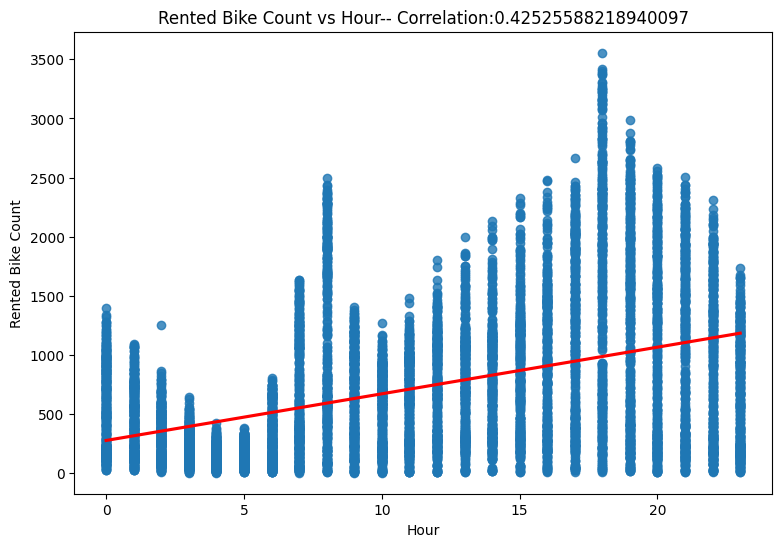

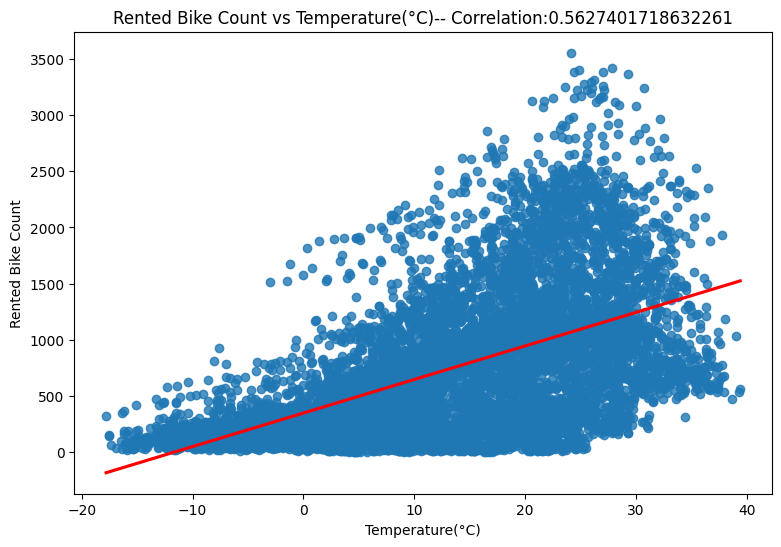

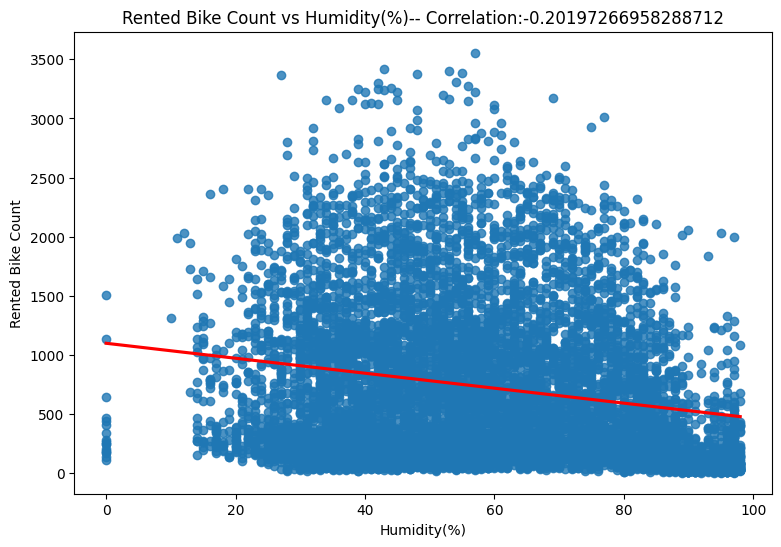

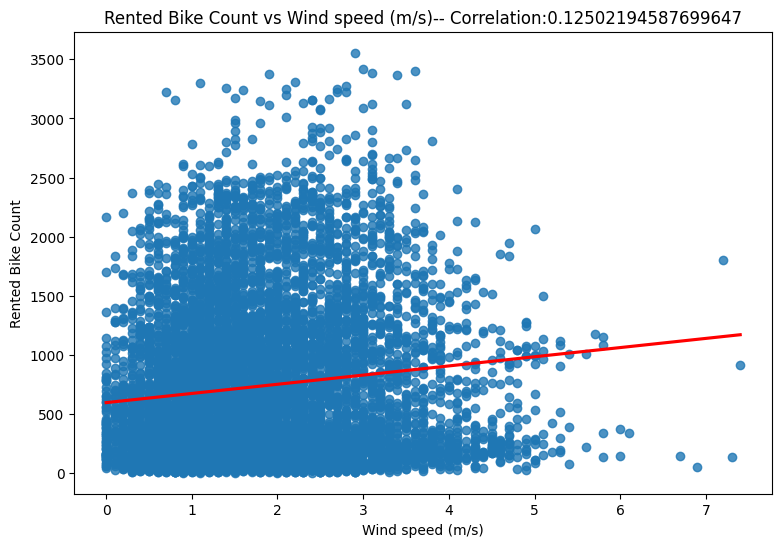

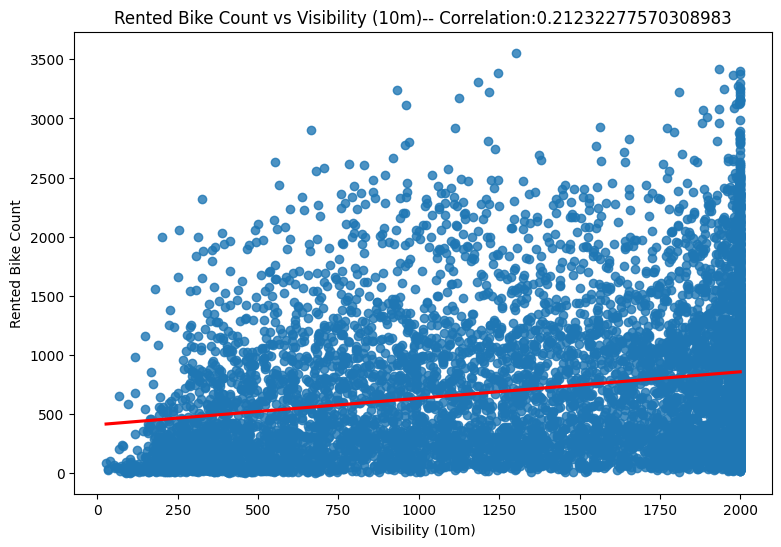

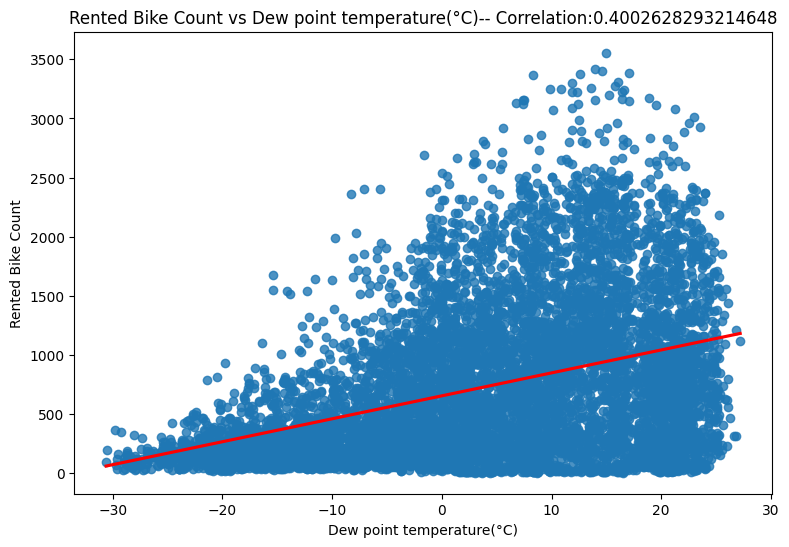

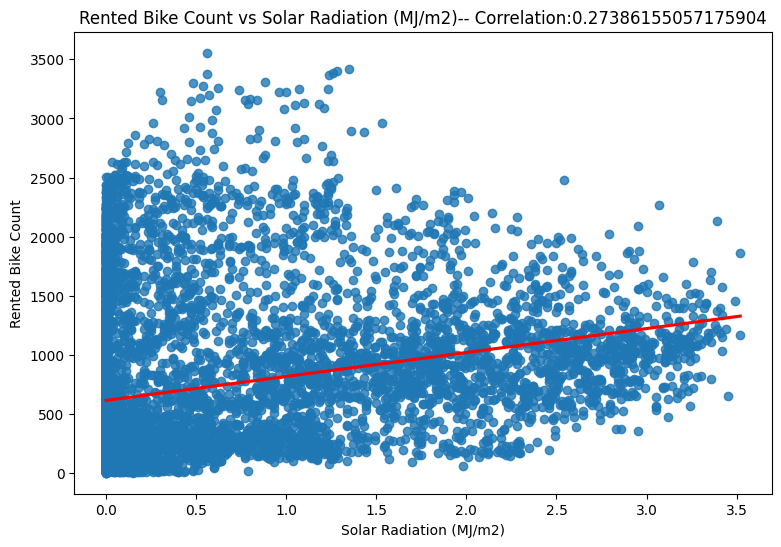

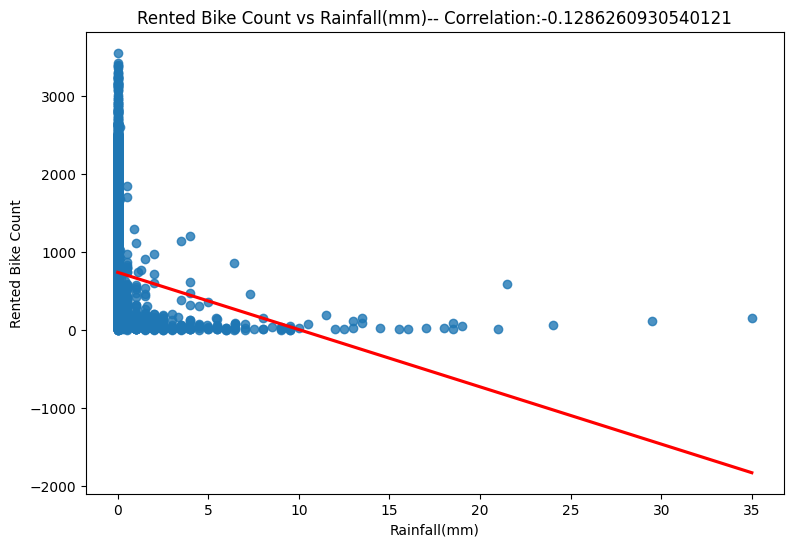

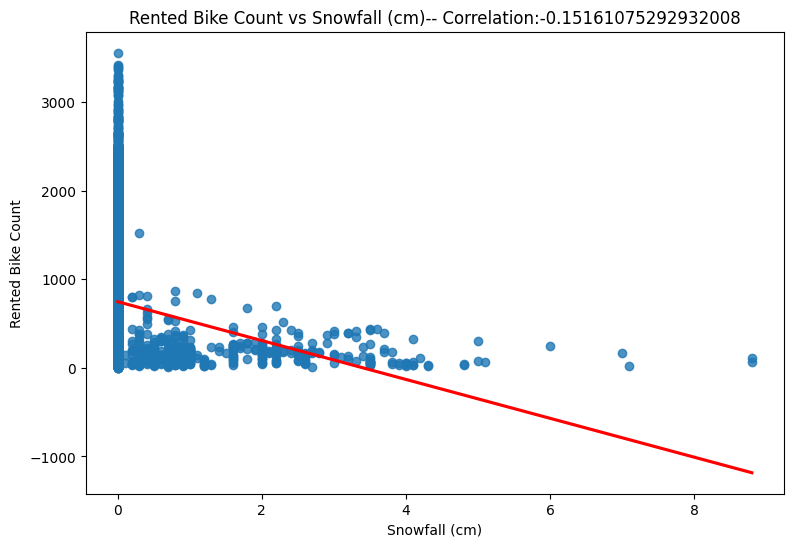

In [ ]:
# for every numeric feature we plot the regreesion plot
for col in numeric_features[1:]:
  plt.figure(figsize = (9,6))
  sns.regplot(data = df, x = col, y = 'Rented Bike Count', ci =None, line_kws={"color": "red"})
  plt.title('Rented Bike Count vs '+ col +'-- Correlation:' + str(df[col].corr(df['Rented Bike Count'])))
  # plt.savefig(f"download_{numeric_features.index(col)}.png")
  # files.download(f'download_{numeric_features.index(col)}.png')
plt.show()

##### 1. Why did you pick the specific chart?

Regplot function plots a scattered plot between the numeric dependent variables and the target variable along with a linear regression model fit. A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

So we plot the rented bike count vs every numeric variable to see the relationship between rented bike count and other numeric features. The regression line will depict whether the rented bike count is increasing or decreasing w.r.t. the numeric variables. 

##### 2. What is/are the insight(s) found from the chart?

The scatter plot between rented bike count and temperature suggests more the temperature, more the rental count, meaning people prefer hot and sunny day to use bikes. Rainfall and Snowfall slightly affect the rental bike count negatively meaning people avoid taking bikes on rainy and snowy days. Other factors like humidity, visibility, wind speed do not affect the target variable much.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

All the numeric variables (except hour) represent weather conditions. These plots can help in making plans for future demands of rental bikes according to the weather forecast.

### Chart 10 - Pairplot

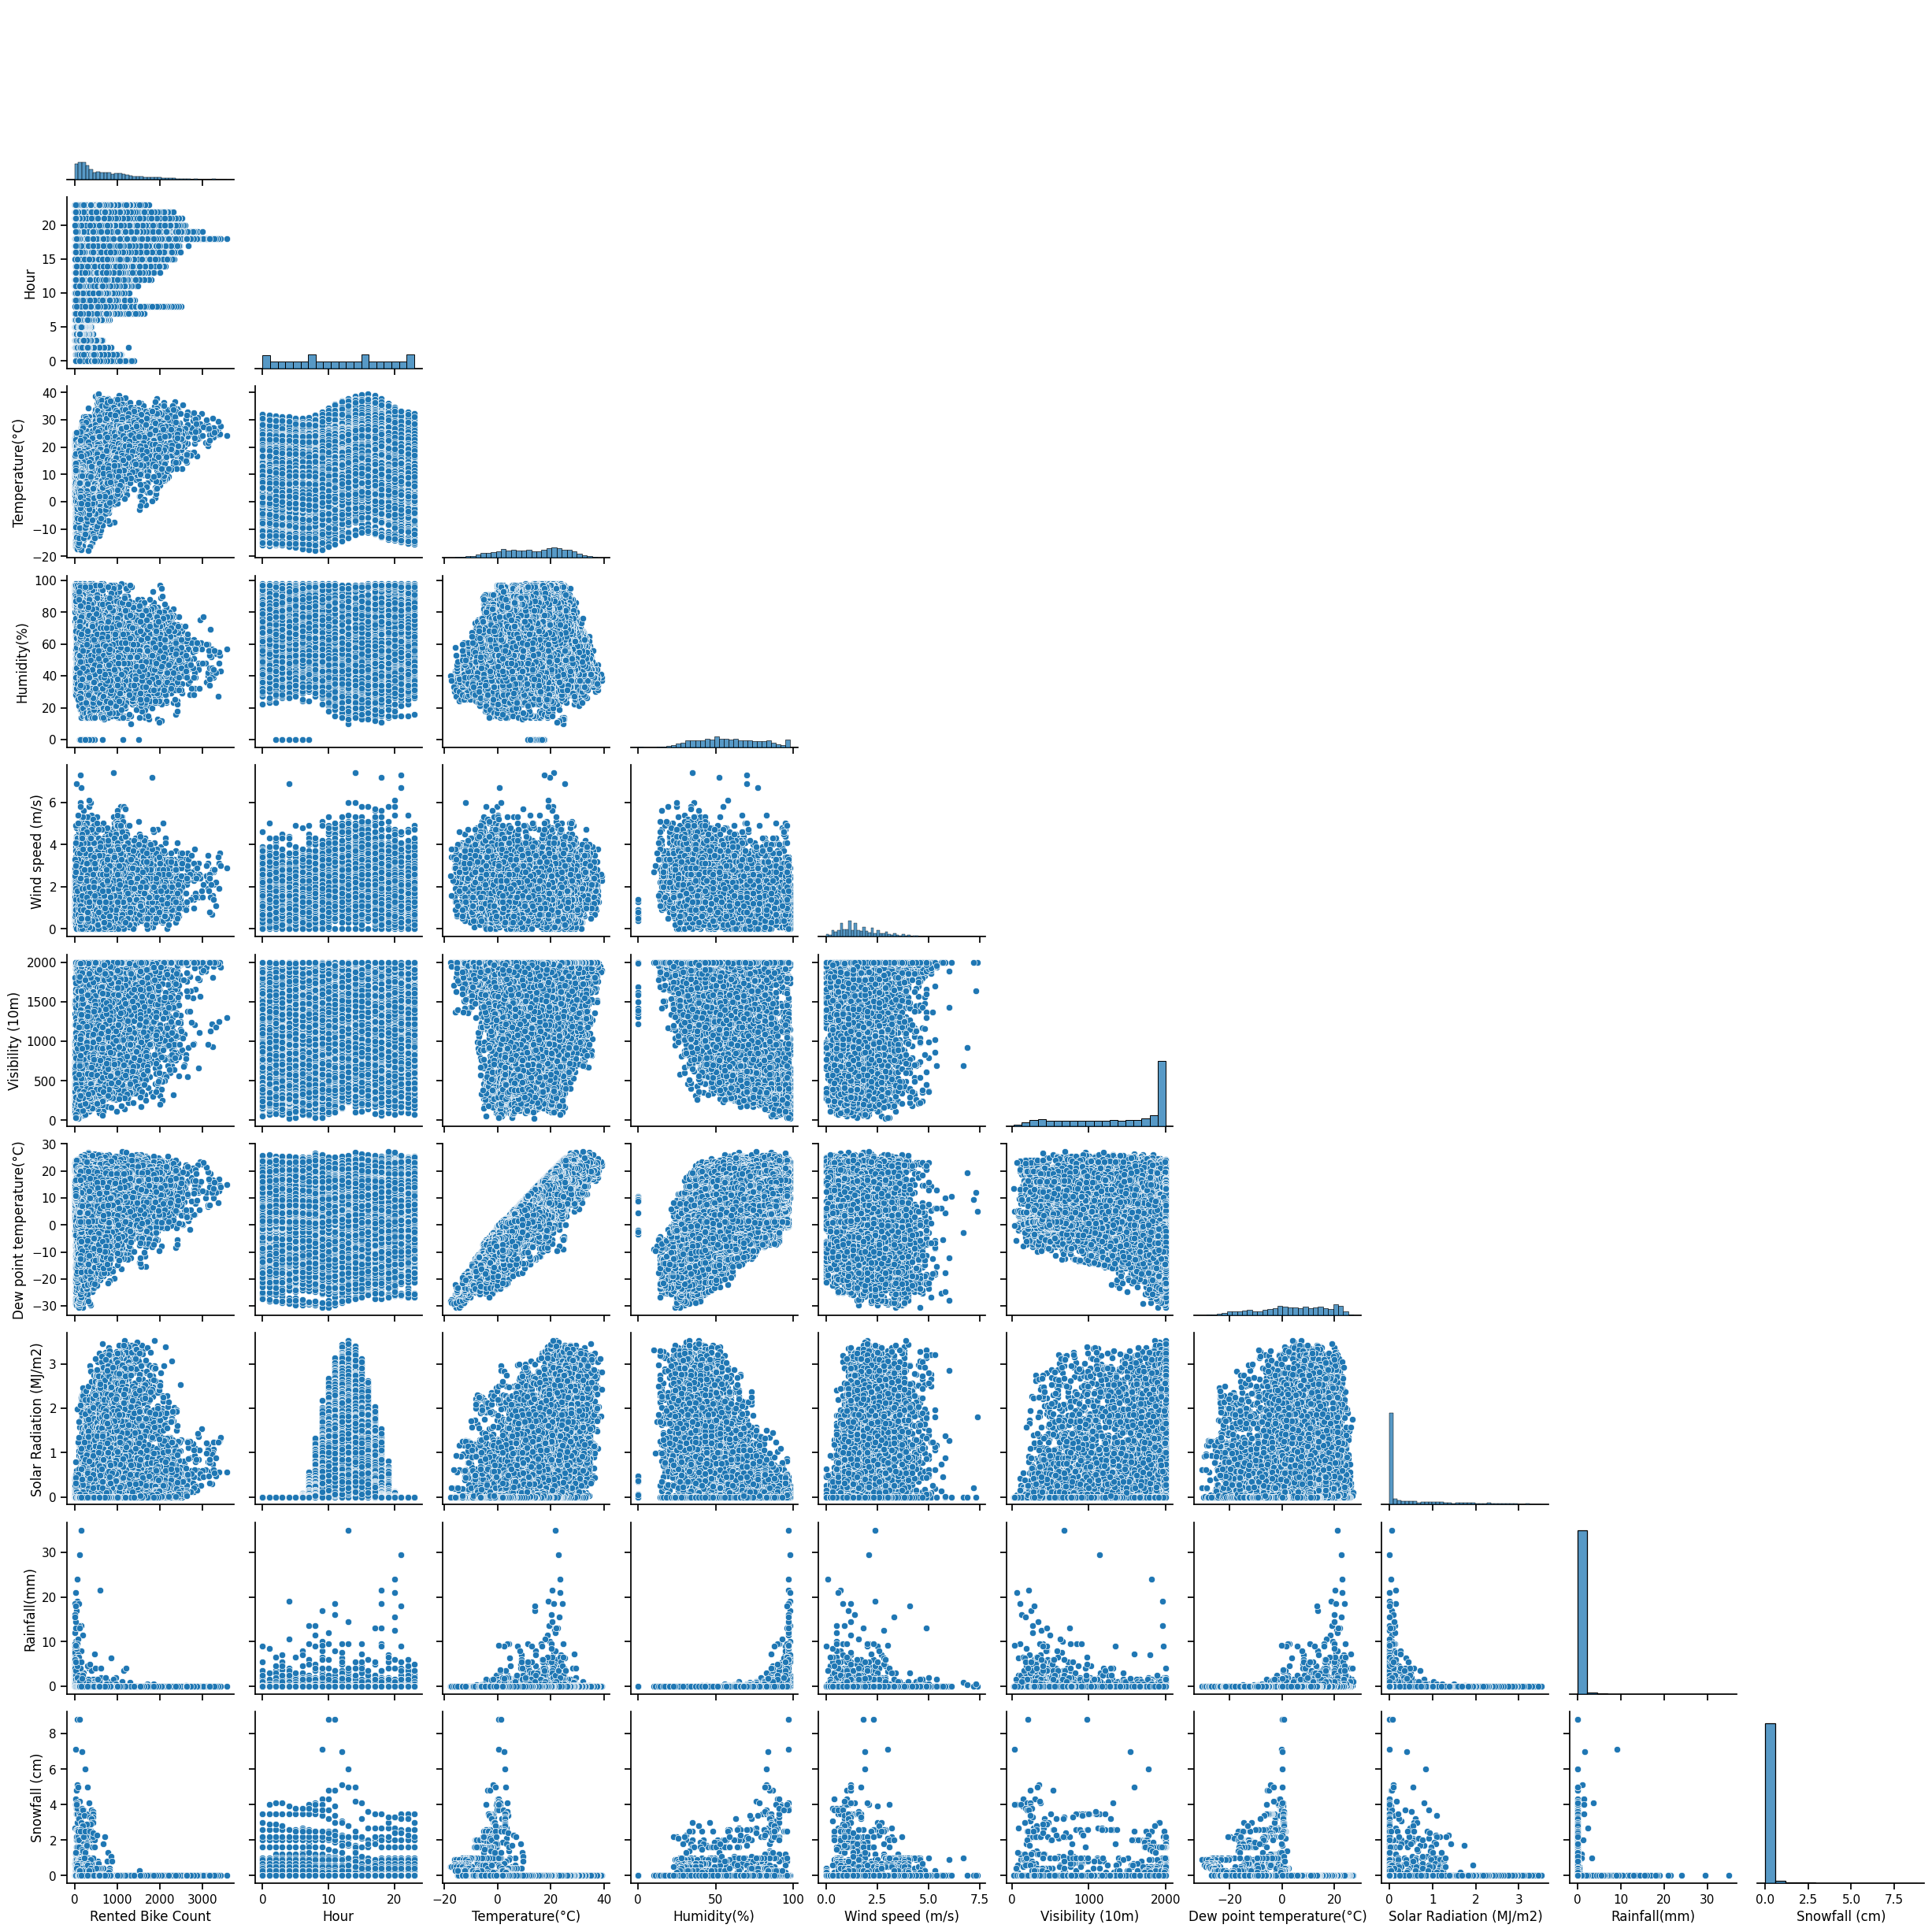

In [ ]:
# adjusting labelsize for seaborn and pairplot
sns.set_context("notebook", rc={"axes.labelsize":12})
sns.pairplot(df, corner = True)

##### 1. Why did you pick the specific chart?

The Seaborn Pairplot allows us to plot pairwise relationships between numeric variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure.

##### 2. What is/are the insight(s) found from the chart?

We note that the distribution between Temperature and Dew Point Temperature is highly linearly distributed meaning they have high correlation. Solar radiation high in the day hours as expected. When temperature is low, snowfall is high. Other plots are fairly scattered and can be inferred from the graph.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Businesses will focus on the plots of rental bike count. However the scatter plots were also obtained in the regplot.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. There is no significant difference in bike rental demand between weekdays and weekends during different seasons. 
2. There is no significant relationship between precipitation and bike rental demand. 
3. Average Bike rental demand is higher for morning rush hour (7AM - 9 AM) than for evening rush hour(5PM - 8PM).

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis:** There is no significant difference in bike rental demand between weekdays and weekends i.e. mean of rental bike count on weekdays equals mean of rental bike count on weekends (µ1 = µ2)

**Alternate Hypothesis:** There is a significant difference in bike rental demand between weekdays and weekends i.e. mean of rental bike count on weekdays does not equals mean of rental bike count on weekends (µ1 ≠ µ2)

**Test Type:** 2-sample 2-Tailed Z-Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# classifying weekday and weekend data
weekend = np.array(df[(df['Day of Week'] == 'Sunday') | (df['Day of Week'] == 'Saturday')]['Rented Bike Count'])
weekend

array([328, 308, 262, ..., 546, 496, 379])

In [ ]:
weekday = np.array(df[(df['Day of Week'] == 'Monday') | (df['Day of Week'] == 'Tuesday')| (df['Day of Week'] == 'Wednesday')| (df['Day of Week'] == 'Thursday')
| (df['Day of Week'] == 'Friday')]['Rented Bike Count'])

In [ ]:
# Perform Statistical Test to obtain P-Value
t_value,p_value=ztest(weekday, weekend, value=0) 

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

Test statistic is 4.269430
p-value for two tailed test is 0.000020


Considering threshold value as 0.05, p-value is less than the threshold value, so we reject the null hypothesis. That means there is a significant difference between the rental bike count on weekdays and weekends.

In [ ]:
weekend.mean(),weekday.mean()

(682.3785333879557, 748.1122177954848)

##### Which statistical test have you done to obtain P-Value?

Here we have performed 2-sample 2-tailed z-test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected which means there is a significant difference between the rental bike count on weekdays and weekends. As we can see the mean of data on weekdays is 748 and on weekend is 682.

##### Why did you choose the specific statistical test?

Z-test is performed when the population standard variance is known and t-test is performed when population standard variance is not known or when sample size is less than 30. Here, since the data we have is the whole population and sample size is above 30, we perform the Z-test.

We had to compare the means of 2 data groups of weekday count and weekend count. So we use the 2-sample test.

Since we are comparing whether the means are equal or not, we use 2-tailed test.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis:** There is no significant relationship between precipitation and bike rental demand i.e. mean of rental bike count on rainy days equals mean of rental bike count on non-rainy days (µ1 = µ2)

**Alternate Hypothesis:** There is a relationship between precipitation and bike rental demand or rain affects rental bike count i.e. mean of rental bike count on rainy days does not equals mean of rental bike count on non-rainy days (µ1 ≠ µ2)

**Test Type:** 2-sample 2-Tailed Z-Test


#### 2. Perform an appropriate statistical test.

In [ ]:
# classifying data as rainy days and non-rainy days
non_rainy = df[df['Rainfall(mm)']==0]['Rented Bike Count']

In [ ]:
rainy = df[df['Rainfall(mm)']!=0]['Rented Bike Count']

In [ ]:
# Perform Statistical Test to obtain P-Value
t_value,p_value=ztest(non_rainy, rainy, value=0) 

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is ',p_value)

Test statistic is 21.033274
p-value for two tailed test is  3.2540327837677446e-98


##### Which statistical test have you done to obtain P-Value?

Here we have performed 2-sample 2-tailed z-test as the statistical testing to obtain P-Value and found that p-value is almost negligible and that Null hypothesis is rejected which means rainfall does affect the rental bike count. This was also evident from the EDA.

##### Why did you choose the specific statistical test?

Here, since the data we have is the whole population and sample size is above 30, we perform the Z-test.

We had to compare the means of 2 data groups of rainy day count and non-rainy day count. So we use the 2-sample test.

Since we are comparing whether the means are equal or not, we use 2-tailed test.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Bike rental demand is higher for morning rush hour (7AM - 9 AM) than for evening rush hour(5PM - 8PM).

**Null Hypothesis:** Bike rental demand is higher for morning rush hour (7AM - 9 AM) than for evening rush hour(5PM - 8PM) i.e. mean of rental bike count in morning is greater than mean of rental bike count in evening (µ1 > µ2)

**Alternate Hypothesis:** Bike rental demand is lower for morning rush hour (7AM - 9 AM) than for evening rush hour(5PM - 8PM) i.e. mean of rental bike count in morning is less than mean of rental bike count in evening (µ1 <= µ2)

**Test Type:** 2-sample 1-Tailed Z-Test

#### 2. Perform an appropriate statistical test.

In [ ]:
morning = df[(df['Hour'] >= 7) & (df['Hour'] <= 9)]['Rented Bike Count']

In [ ]:
evening = df[(df['Hour'] >= 17) & (df['Hour'] <= 20)]['Rented Bike Count']

In [ ]:
# Perform Statistical Test to obtain P-Value
t_value,p_value=ztest(morning, evening, value=0, alternative = 'smaller') 

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is ',p_value)

Test statistic is -15.769481
p-value for two tailed test is  2.5231173209157853e-56


##### Which statistical test have you done to obtain P-Value?

Here we have performed 2-sample 1-tailed z-test as the statistical testing to obtain P-Value and found that p-value is almost negligible and that Null hypothesis is rejected which means the demand for bike in the morning is lower than demand in the evening. This was also evident from the EDA.

##### Why did you choose the specific statistical test?

Here, since the data we have is the whole population and sample size is above 30, we perform the Z-test.

We had to compare the means of 2 data groups of morning count and evening count. So we use the 2-sample test.

Since we are comparing whether the mean of one morning data is higher than the mean of evening data, we use 1-tailed test as we need to test in one-direction.

## ***6. Feature Engineering & Data Pre-processing***

Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning. Feature engineering in machine learning aims to improve the performance of models.

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Month                        0
Day of Week                  0
dtype: int64


<Axes: >

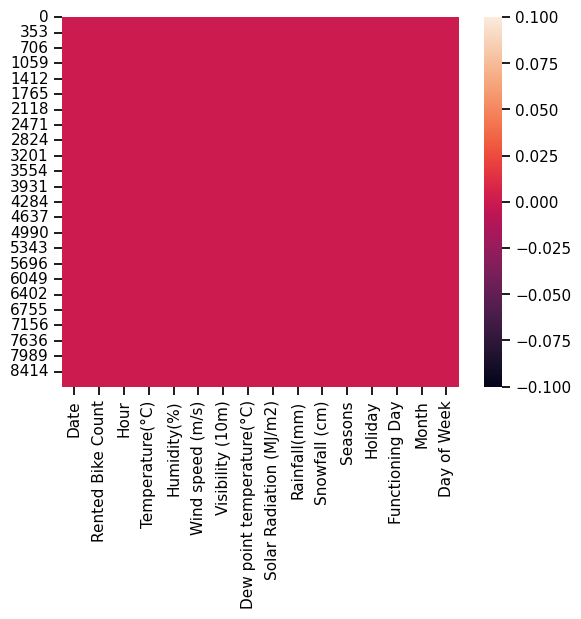

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull())

#### What all missing value imputation techniques have you used and why did you use those techniques?

There were no missing values in the given dataset.

### 2. Handling Outliers

From Exploratory data analysis, using density plot, we saw that none of the feature follow normal distribution. So we cannot detect outliers based on z-score. So we use the box plot method to see the outliers.

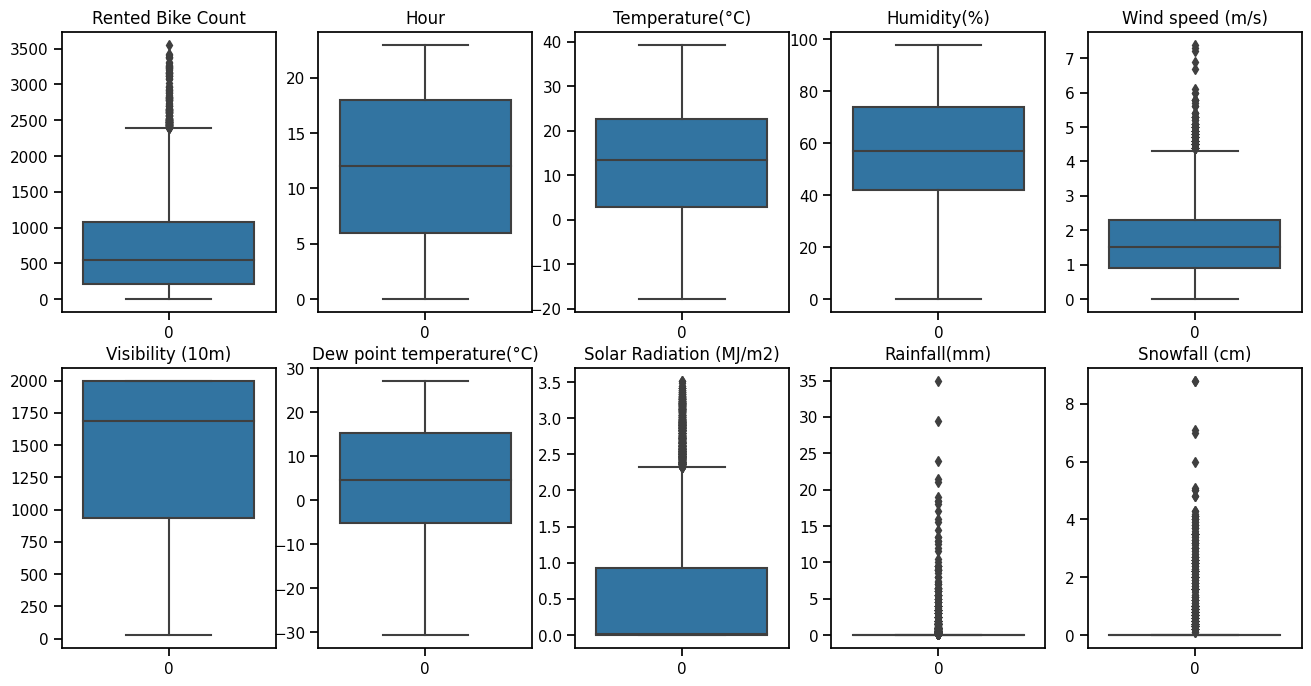

In [ ]:
# Checking for Outliers using Box Plots
numeric_cols = np.array(df.describe().columns)
n=1
plt.figure(figsize=(16,8))
for col in numeric_cols:
  feature = df[col]
  ax = plt.subplot(2,5,n)
  ax.set_title(col)
  sns.boxplot(feature)
  n+=1
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

We use the box plot graph to see the outliers in the dataset, which we have already used in the Exploratory Data Analysis section. When reviewing a box plot, an outlier is defined as a data point that is located outside the whiskers of the box plot i.e. outside 1.5 times the interquartile range above the upper quartile and below the lower quartile (Q1 – 1.5 * IQR or Q3 + 1.5 * IQR).

We can notice many outlier points in the distribution of Rented Bike Count, Wind speed, Solar Radiation, Rainfall and Snowfall.

However, dropping those records won’t be wise as these represent natural variations in the population which are called true outliers and not due to measurement errors, data entry or processing errors, or poor sampling. There is reasonable chance of these numbers appearing in the data so these data points need to be retained.

### 3. Feature Manipulation & Selection

#### Checking Multicollinearity

**Multicollinearity** occurs when independent variables in a regression model are correlated. Moderate multicollinearity may not be problematic. However, severe multicollinearity is a problem because it can increase the variance of the coefficient estimates and make the estimates very sensitive to minor changes in the model. Multicollinearity reduces the precision of the estimated coefficients, which weakens the statistical power of your regression model. It mainly affects the multiple linear regression models and tree based models are mostly immune to it.

<Axes: >

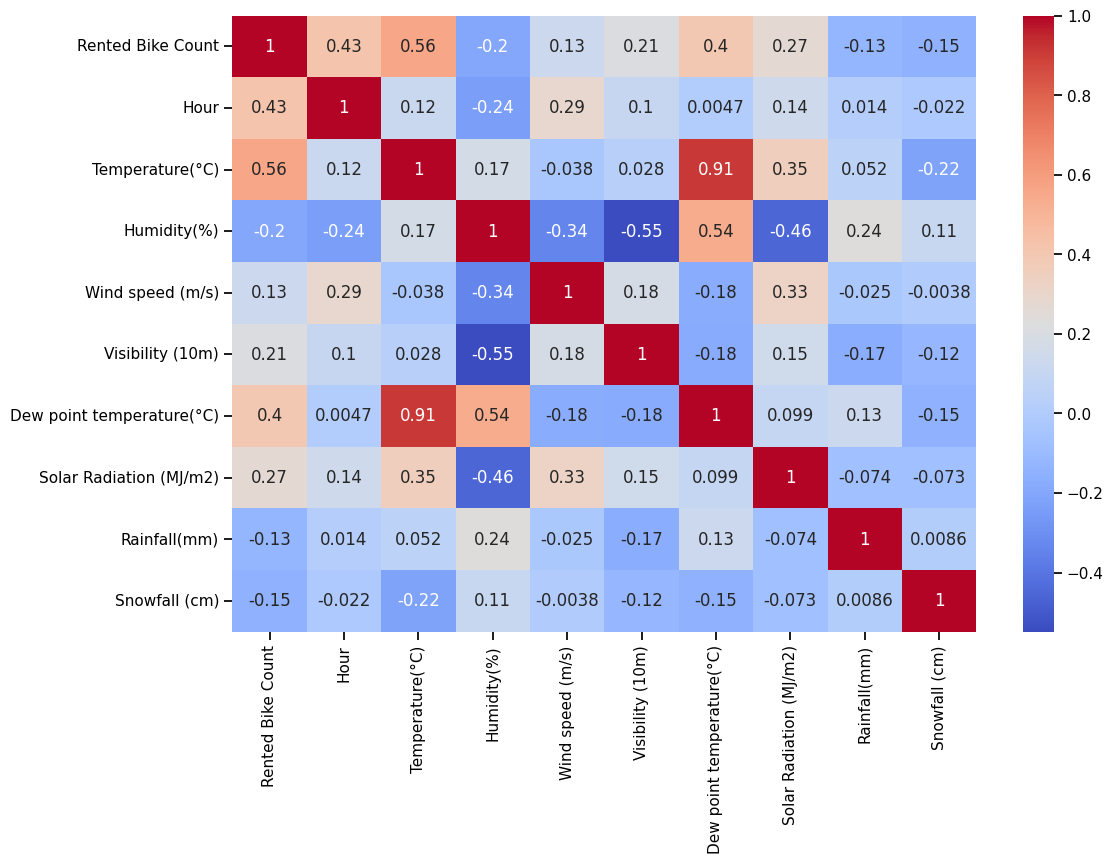

In [ ]:
# checking correlation using heatmap
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)

The heatmap shows that Temperature and Dew point temperature are the most linearly correlated features with correlation coefficient of 0.91. This was also inferred from the pairplot in EDA section.

#### Variation Inflation Factor

Variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. It can estimate how much the variance of a regression coefficient is inflated due to multicollinearity. A large VIF on an independent variable indicates a highly collinear relationship to the other variables.

In [ ]:
# creating a function to calculate VIF for all numeric variables in the dataset
# we import variation_inflation_factor() function from Statsmodels module
def calc_vif(X):
  vif = pd.DataFrame()
  vif['variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i ) for i in range(len(X.columns))]
  return vif

In [ ]:
# finding vif for numeric features
calc_vif(df[[i for i in df.describe().columns]])

variables        VIF
0          Rented Bike Count   4.674615
1                       Hour   5.159976
2            Temperature(°C)  36.306687
3                Humidity(%)   5.475162
4           Wind speed (m/s)   4.816527
5           Visibility (10m)   9.100510
6  Dew point temperature(°C)  17.447780
7    Solar Radiation (MJ/m2)   2.897848
8               Rainfall(mm)   1.110871
9              Snowfall (cm)   1.123164

As expected, the most correlated features (Temperature and Dew Point Temperature) in the dataset have very high VIF. The acceptable limit for VIF is around 10. Now we check the VIF for dataset by not including the Dew Point Temperature feature.

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Dew point temperature(°C)']]])

variables       VIF
0        Rented Bike Count  4.617043
1                     Hour  4.815356
2          Temperature(°C)  4.589017
3              Humidity(%)  5.048064
4         Wind speed (m/s)  4.625286
5         Visibility (10m)  4.880668
6  Solar Radiation (MJ/m2)  2.243573
7             Rainfall(mm)  1.110039
8            Snowfall (cm)  1.122836

Now the VIF for all numeric features is in acceptable limits. So we'll drop the Dew Point Temperature feature.

#### Removing Redundant Columns

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'Day of Week'],
      dtype='object')

Along with dew point temperature, we also remove the date column as we have extracted the month and day already. We also remove Functioning day feature as it now contains only one unique value.

In [ ]:
df.drop(columns = ['Dew point temperature(°C)','Date','Functioning Day'], inplace = True)

In [ ]:
df[25:35]

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
25                308     1             -2.2           86               0.6   
26                262     2             -2.9           86               1.5   
27                167     3             -3.5           81               2.2   
28                 89     4             -3.8           79               2.0   
29                 79     5             -4.0           79               1.5   
30                 70     6             -4.3           82               2.1   
31                146     7             -4.4           81               2.5   
32                219     8             -4.2           79               2.1   
33                328     9             -2.9           68               1.6   
34                334    10             -0.4           57               1.6   

    Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
25               990                     0.00           0.0            0.0   
26              1256                     0.00           0.0            0.0   
27              1221                     0.00           0.0            0.0   
28              1167                     0.00           0.0            0.0   
29              1202                     0.00           0.0            0.0   
30              1178                     0.00           0.0            0.0   
31              1276                     0.00           0.0            0.0   
32              1436                     0.01           0.0            0.0   
33              1487                     0.30           0.0            0.0   
34              1309                     0.80           0.0            0.0   

   Seasons     Holiday     Month Day of Week  
25  Winter  No Holiday  December    Saturday  
26  Winter  No Holiday  December    Saturday  
27  Winter  No Holiday  December    Saturday  
28  Winter  No Holiday  December    Saturday  
29  Winter  No Holiday  December    Saturday  
30  Winter  No Holiday  December    Saturday  
31  Winter  No Holiday  December    Saturday  
32  Winter  No Holiday  December    Saturday  
33  Winter  No Holiday  December    Saturday  
34  Winter  No Holiday  December    Saturday

### 4. Categorical Encoding

Variables that do not have any natural scale of measurement, usually indicate the presence or absence of a “quality” or an attribute like yes or no, so they are defined on a nominal scale. Such variables can be quantified by artificially constructing the variables that take the values, e.g., 1 and 0 where “1” indicates usually the presence of an attribute and “0” usually indicates the absence of an attribute.

#### Converting "Holiday" categorical variable to Binary variable

The "Holiday" column has 2 values - Holiday and No Holiday. So we convert the contents into 1 for Holiday and 0 for No Holiday.

In [ ]:
df['Holiday'] = (df['Holiday'] == 'Holiday')*1
df[500:515]

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
500                288    20              0.2           72               0.7   
501                248    21             -0.4           74               0.6   
502                252    22             -1.1           78               0.6   
503                212    23             -1.5           79               0.6   
504                196     0             -1.7           79               0.5   
505                250     1             -1.6           79               0.6   
506                161     2             -1.1           79               0.7   
507                 99     3             -0.6           76               0.5   
508                 64     4             -0.3           76               0.9   
509                 76     5             -0.2           73               0.8   
510                114     6             -0.1           71               0.8   
511                283     7             -0.3           72               0.7   
512                544     8             -0.4           69               0.5   
513                298     9              0.3           67               0.7   
514                248    10              1.4           64               1.0   

     Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
500               990                     0.00           0.0            0.8   
501              1065                     0.00           0.0            0.8   
502               865                     0.00           0.0            0.8   
503               821                     0.00           0.0            0.8   
504               794                     0.00           0.0            0.8   
505               784                     0.00           0.0            0.8   
506               736                     0.00           0.0            0.8   
507               789                     0.00           0.0            0.7   
508               760                     0.00           0.0            0.7   
509               880                     0.00           0.0            0.7   
510               895                     0.00           0.0            0.7   
511               919                     0.00           0.0            0.7   
512               904                     0.00           0.0            0.7   
513               897                     0.03           0.0            0.6   
514               897                     0.25           0.0            0.5   

    Seasons  Holiday     Month Day of Week  
500  Winter        0  December    Thursday  
501  Winter        0  December    Thursday  
502  Winter        0  December    Thursday  
503  Winter        0  December    Thursday  
504  Winter        1  December      Friday  
505  Winter        1  December      Friday  
506  Winter        1  December      Friday  
507  Winter        1  December      Friday  
508  Winter        1  December      Friday  
509  Winter        1  December      Friday  
510  Winter        1  December      Friday  
511  Winter        1  December      Friday  
512  Winter        1  December      Friday  
513  Winter        1  December      Friday  
514  Winter        1  December      Friday

In [ ]:
df['Holiday'].unique()

array([0, 1])

#### Creating Dummy variables

A dummy variable is a variable that takes values of 0 and 1, where the values indicate the presence or absence of something (e.g., a 0 may indicate a placebo and 1 may indicate a drug). Where a categorical variable has more than two categories, it can be represented by a set of dummy variables, with one variable for each category. So we create dummy variables for the features Seasons, Month, Day of Week and also Hour as it is not ordinal variable but nominal variable.

In [ ]:
# pandas function to get dataframe with categorical variables converted to dummy variables
df = pd.get_dummies(df)
df

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0             -5.2           37               2.2   
1                   204     1             -5.5           38               0.8   
2                   173     2             -6.0           39               1.0   
3                   107     3             -6.2           40               0.9   
4                    78     4             -6.0           36               2.3   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43               1.3   

      Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0                 2000                      0.0           0.0            0.0   
1                 2000                      0.0           0.0            0.0   
2                 2000                      0.0           0.0            0.0   
3                 2000                      0.0           0.0            0.0   
4                 2000                      0.0           0.0            0.0   
...                ...                      ...           ...            ...   
8755              1894                      0.0           0.0            0.0   
8756              2000                      0.0           0.0            0.0   
8757              1968                      0.0           0.0            0.0   
8758              1859                      0.0           0.0            0.0   
8759              1909                      0.0           0.0            0.0   

      Holiday  ...  Month_November  Month_October  Month_September  \
0           0  ...               0              0                0   
1           0  ...               0              0                0   
2           0  ...               0              0                0   
3           0  ...               0              0                0   
4           0  ...               0              0                0   
...       ...  ...             ...            ...              ...   
8755        0  ...               1              0                0   
8756        0  ...               1              0                0   
8757        0  ...               1              0                0   
8758        0  ...               1              0                0   
8759        0  ...               1              0                0   

      Day of Week_Friday  Day of Week_Monday  Day of Week_Saturday  \
0                      1                   0                     0   
1                      1                   0                     0   
2                      1                   0                     0   
3                      1                   0                     0   
4                      1                   0                     0   
...                  ...                 ...                   ...   
8755                   1                   0                     0   
8756                   1                   0                     0   
8757                   1                   0                     0   
8758                   1                   0                     0   
8759                   1                   0                     0   

      Day of Week_Sunday  Day of Week_Thursday  Day of Week_Tuesday  \
0                      0                     0                    0   
1                      0                     0                    0   
2                      0                     0                    0   
3                      0                     0                    0   
4                      0           

In [ ]:
df = pd.get_dummies(df, columns = ['Hour'])
pd.options.display.max_columns = 135
df.head()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Holiday  Seasons_Autumn  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
0        0               0               0               0               1   
1        0               0               0               0               1   
2        0               0               0               0               1   
3        0               0               0               0               1   
4        0               0               0               0               1   

   Month_April  Month_August  Month_December  Month_February  Month_January  \
0            0             0               1               0              0   
1            0             0               1               0              0   
2            0             0               1               0              0   
3            0             0               1               0              0   
4            0             0               1               0              0   

   Month_July  Month_June  Month_March  Month_May  Month_November  \
0           0           0            0          0               0   
1           0           0            0          0               0   
2           0           0            0          0               0   
3           0           0            0          0               0   
4           0           0            0          0               0   

   Month_October  Month_September  Day of Week_Friday  Day of Week_Monday  \
0              0                0                   1                   0   
1              0                0                   1                   0   
2              0                0                   1                   0   
3              0                0                   1                   0   
4              0                0                   1                   0   

   Day of Week_Saturday  Day of Week_Sunday  Day of Week_Thursday  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     0                   0                     0   

   Day of Week_Tuesday  Day of Week_Wednesday  Hour_0  Hour_1  Hour_2  Hour_3  \
0                    0                      0       1       0       0       0   
1                    0                      0       0       1       0       0   
2                    0                      0       0       0       1       0   
3                    0                      0       0       0       0       1   
4                    0                      0       0       0       0       0   

   Hour_4  Hour_5  Hour_6  Hour_7  Hour_8  Hour_9  Hour_10  Hour_11  Hour_12  \
0       0       0       0       0       0       0        0        0        0   
1       0       0       0       0       0       0        0        0        0   
2       0       0       0       0       0       0        0        0        0   
3       0       0       0       0       0       0        0     

In [ ]:
# making sure we have all numeric datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8465 non-null   int64  
 1   Temperature(°C)          8465 non-null   float64
 2   Humidity(%)              8465 non-null   int64  
 3   Wind speed (m/s)         8465 non-null   float64
 4   Visibility (10m)         8465 non-null   int64  
 5   Solar Radiation (MJ/m2)  8465 non-null   float64
 6   Rainfall(mm)             8465 non-null   float64
 7   Snowfall (cm)            8465 non-null   float64
 8   Holiday                  8465 non-null   int64  
 9   Seasons_Autumn           8465 non-null   uint8  
 10  Seasons_Spring           8465 non-null   uint8  
 11  Seasons_Summer           8465 non-null   uint8  
 12  Seasons_Winter           8465 non-null   uint8  
 13  Month_April              8465 non-null   uint8  
 14  Month_August            

#### What all categorical encoding techniques have you used & why did you use those techniques?

We have used One-hot encoding technique for the categorical feature of Month, Seasons and Hour. We use one-hot encoding as the values of these features have no ranking between them i.e. these are not ordinal data. Even the Hour feature is not ordinal meaning there is no superiority between 9 AM and 11 AM. So a feature is created for each value of these variables with values 0 or 1 where 1.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Feature transformation refers to the process of transforming the original features or variables of a dataset into a new set of features that may be more suitable for analysis or modeling. The goal of feature transformation is to improve the quality and relevance of the features used in modeling, while preserving the underlying information in the original data.

Some situations in which data transformation may be beneficial include:
1. When the data is highly skewed
2. When the data has outliers
3. When the relationship between the variables is non-linear

In feature of Rainfall and Snowfall, the data is skewed as most datapoints are concentrated at 0. Further, these have many outliers too. So we apply power transformation. Power transformation is a type of data transformation that involves raising the original values to a specified power to create a new set of transformed values. Power transformations can be useful for several purposes, including:

1. Reducing the impact of extreme values or outliers: By raising the values to a power less than 1 (e.g., 0.5 or 0.1), the transformation can reduce the influence of large values and make the distribution of values more symmetrical.

2. Normalizing the distribution of values: Power transformations can be used to create a more normal or symmetric distribution of values, which can be useful for certain types of machine learning algorithms that assume a normal distribution of data. 

<Axes: title={'center': 'Density plot of Snowfall before transformation'}, ylabel='Density'>

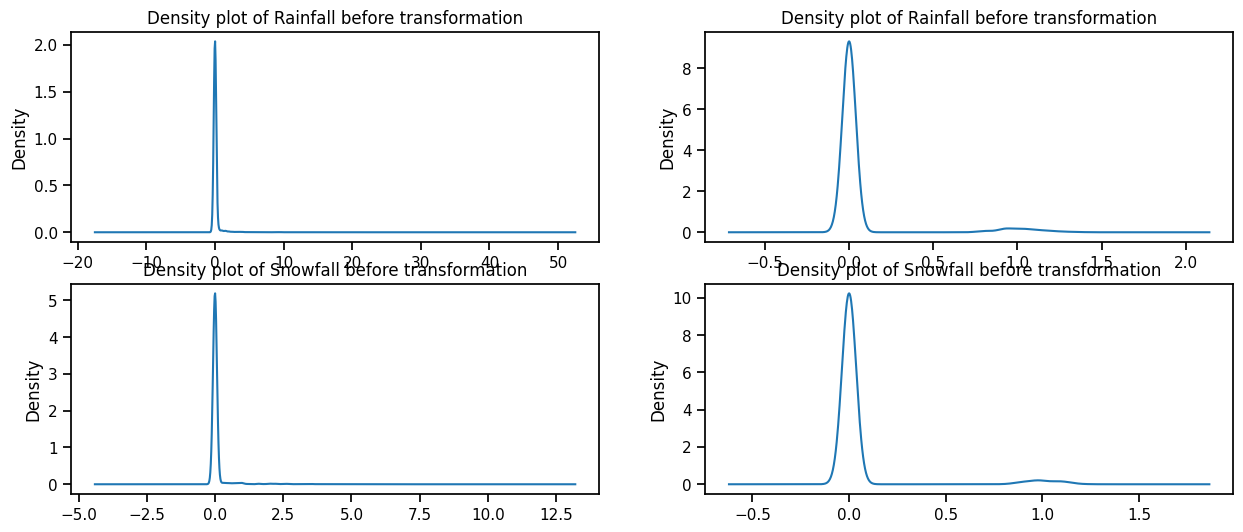

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(221)
plt.gca().set_title('Density plot of Rainfall before transformation')
(df['Rainfall(mm)']).plot(kind='kde')
plt.subplot(222)
plt.gca().set_title('Density plot of Rainfall before transformation')
(df['Rainfall(mm)']**.1).plot(kind='kde')
plt.subplot(223)
plt.gca().set_title('Density plot of Snowfall before transformation')
(df['Snowfall (cm)']).plot(kind='kde')
plt.subplot(224)
plt.gca().set_title('Density plot of Snowfall before transformation')
(df['Snowfall (cm)']**.1).plot(kind='kde')

In [ ]:
# Transform Your data
df['Rainfall(mm)'] = df['Rainfall(mm)']**0.1
df['Snowfall (cm)'] = df['Snowfall (cm)']**0.1

The transformation has a smoothing effect on the features and it creates a more normal distribution of values.

### 6. Separating Dependent and Independent variables.

First we separate the independent features and dependent feature.

In [ ]:
df.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Seasons_Autumn',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Month_April',
       'Month_August', 'Month_December', 'Month_February', 'Month_January',
       'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September',
       'Day of Week_Friday', 'Day of Week_Monday', 'Day of Week_Saturday',
       'Day of Week_Sunday', 'Day of Week_Thursday', 'Day of Week_Tuesday',
       'Day of Week_Wednesday', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3',
       'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10',
       'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16',
       'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22',
       'Hour_23'],
      dtype='object')

In [ ]:
# output of model is the Rented bike count
# creating list of feature names first
dependent_var = 'Rented Bike Count'
independent_var = list(df.columns)
independent_var.remove(dependent_var)

In [ ]:
independent_var

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Holiday',
 'Seasons_Autumn',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter',
 'Month_April',
 'Month_August',
 'Month_December',
 'Month_February',
 'Month_January',
 'Month_July',
 'Month_June',
 'Month_March',
 'Month_May',
 'Month_November',
 'Month_October',
 'Month_September',
 'Day of Week_Friday',
 'Day of Week_Monday',
 'Day of Week_Saturday',
 'Day of Week_Sunday',
 'Day of Week_Thursday',
 'Day of Week_Tuesday',
 'Day of Week_Wednesday',
 'Hour_0',
 'Hour_1',
 'Hour_2',
 'Hour_3',
 'Hour_4',
 'Hour_5',
 'Hour_6',
 'Hour_7',
 'Hour_8',
 'Hour_9',
 'Hour_10',
 'Hour_11',
 'Hour_12',
 'Hour_13',
 'Hour_14',
 'Hour_15',
 'Hour_16',
 'Hour_17',
 'Hour_18',
 'Hour_19',
 'Hour_20',
 'Hour_21',
 'Hour_22',
 'Hour_23']

In [ ]:
X = df[independent_var]
X.tail()

Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
8755              4.2           34               2.6              1894   
8756              3.4           37               2.3              2000   
8757              2.6           39               0.3              1968   
8758              2.1           41               1.0              1859   
8759              1.9           43               1.3              1909   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Holiday  \
8755                      0.0           0.0            0.0        0   
8756                      0.0           0.0            0.0        0   
8757                      0.0           0.0            0.0        0   
8758                      0.0           0.0            0.0        0   
8759                      0.0           0.0            0.0        0   

      Seasons_Autumn  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
8755               1               0               0               0   
8756               1               0               0               0   
8757               1               0               0               0   
8758               1               0               0               0   
8759               1               0               0               0   

      Month_April  Month_August  Month_December  Month_February  \
8755            0             0               0               0   
8756            0             0               0               0   
8757            0             0               0               0   
8758            0             0               0               0   
8759            0             0               0               0   

      Month_January  Month_July  Month_June  Month_March  Month_May  \
8755              0           0           0            0          0   
8756              0           0           0            0          0   
8757              0           0           0            0          0   
8758              0           0           0            0          0   
8759              0           0           0            0          0   

      Month_November  Month_October  Month_September  Day of Week_Friday  \
8755               1              0                0                   1   
8756               1              0                0                   1   
8757               1              0                0                   1   
8758               1              0                0                   1   
8759               1              0                0                   1   

      Day of Week_Monday  Day of Week_Saturday  Day of Week_Sunday  \
8755                   0                     0                   0   
8756                   0                     0                   0   
8757                   0                     0                   0   
8758                   0                     0                   0   
8759                   0                     0                   0   

      Day of Week_Thursday  Day of Week_Tuesday  Day of Week_Wednesday  \
8755                     0                    0                      0   
8756                     0                    0                      0   
8757                     0                    0                      0   
8758                     0                    0                      0   
8759                     0                    0                      0   

      Hour_0  Hour_1  Hour_2  Hour_3  Hour_4  Hour_5  Hour_6  Hour_7  Hour_8  \
8755       0       0       0       0       0       0       0       0       0   
8756       0       0       0       0       0       0       0       0       0   
8757       0       0       0       0       0       0       0       0       0   
8758       0       0       0       0       0       0       0       0       0   
8759       0       0       0       0       0       0       0       0       0   

      Hour_9  Hour_10  Hour_11  Hour_12  Hour_13  Hour_14  Hour_15 

In [ ]:
y = df[[dependent_var]]
y.tail()

Rented Bike Count
8755               1003
8756                764
8757                694
8758                712
8759                584

### 7. Data Splitting

The train-test split is a technique for evaluating the performance of a machine learning algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset. The objective is to estimate the performance of the machine learning model on new data i.e. data not used to train the model.

In [ ]:
# splitting in ratio train:test = 80:20
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, random_state = 0)

In [ ]:
X_train.shape, y_train.shape

((6348, 55), (6348, 1))

In [ ]:
X_test.shape, y_test.shape

((2117, 55), (2117, 1))

Previously we had 8465 rows. Now training set has 0.75*8465 = 6348 rows and remaining 2117 rows in testing data.

##### What data splitting ratio have you used and why? 

Answer Here.

### 8. Data Scaling

In [ ]:
# using minmaxscaler to scale the data
scaler = MinMaxScaler()
# using scaler object to fit to training data and then transform the train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

The training data is now scaled between 0 and 1 according to the minimum and maximum value in the data.

In [ ]:
X_train_scaled

array([[0.51142355, 0.82653061, 0.16216216, ..., 0.        , 1.        ,
        0.        ],
       [0.53427065, 0.57142857, 0.33783784, ..., 0.        , 0.        ,
        0.        ],
       [0.66783831, 0.68367347, 0.16216216, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.79086116, 0.31632653, 0.25675676, ..., 0.        , 0.        ,
        0.        ],
       [0.47627417, 0.31632653, 0.10810811, ..., 0.        , 0.        ,
        0.        ],
       [0.43233743, 0.84693878, 0.44594595, ..., 0.        , 0.        ,
        0.        ]])

##### Which method have you used to scale you data and why?

Normalization scales the values of a feature to a range between 0 and 1. This is done by subtracting the minimum value of the feature from each value, and then dividing by the range of the feature.

Standardization scales the values of a feature to have a mean of 0 and a standard deviation of 1. This is done by subtracting the mean of the feature from each value, and then dividing by the standard deviation.


We have used Normalization using MinMaxScaler function. Normalization of data is done when the data distribution is unknown or the data doesn't have Gaussian Distribution. Standardized data is usually preferred when the data has a bell curve i.e. it has gaussian distribution. Since all of our features do not have gaussian distribution, we use Normalization.

### 9. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is a technique used to reduce the number of features or variables in a dataset while preserving the most important information. Dimensionality reduction is useful mainly in following cases:

1. High-Dimensional Data: When the dataset has a large number of features, it may be challenging to fit a regression model without overfitting. Dimensionality reduction can help reduce the number of features, making the model more manageable and reducing the risk of overfitting.

2. Multicollinearity: When two or more variables in the dataset are highly correlated, it can cause problems for the regression model, as it can be challenging to distinguish between the effects of each variable. Dimensionality reduction can help remove the redundant features and improve the accuracy of the model.

3. Computationally Expensive Models: Some regression models may be computationally expensive, especially when working with large datasets. By reducing the number of features, dimensionality reduction can make the model more efficient and faster to run.

In this dataset, after encoding we have 55 features, which is not high compared to real life machine learning problems. Further we have removed the only multicollinear feature that we had. And again we do not have many rows (less than 7000 after splitting). All in all, the data is not very large and so we do not want to reduce the dimension. So we won't use dimensionality reduction.

### 10. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Imbalanced datasets are typically an issue in classification tasks, where there are discrete target classes, and the imbalance occurs when the number of instances in one class is significantly higher or lower than the number of instances in other classes.

In regression analysis, the target variable is typically a continuous variable, and the focus is on predicting its value rather than its class. Therefore, the issue of class imbalance is not applicable.

However, it is still important to ensure that the data is representative of the underlying population and that there are no issues with the distribution of the continuous features. Anyhow we checked the distribution of target variables in EDA section through density plot and even though it has outliers, it is not too skewed to pose an imbalance problem.

## ***7. ML Model Implementation***

For every regression technique that we use here, we first create the model, then we train the model to fit to the training dataset. Then we make the predictions on the test data which is the unseen data for the model. Finally to measure the performance of the model, we calculate various performance metrics using the predicted values and actual test values for the model. However, before proceeding for model implementation, we have few prerequisites for the dataset.

### ML Model 1 - Linear Regression

At first, we implement linear regression. Since linear regression uses gradient descent algorithm, we need to scale our data as part of preprocessing before training our model.

In [ ]:
# using minmaxscaler to scale the data
scaler = MinMaxScaler()
# using scaler object to fit to training data and then transform the train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

The training data is now scaled between 0 and 1 according to the minimum and maximum value in the data.

In [ ]:
X_train_scaled

array([[0.51142355, 0.82653061, 0.16216216, ..., 0.        , 1.        ,
        0.        ],
       [0.53427065, 0.57142857, 0.33783784, ..., 0.        , 0.        ,
        0.        ],
       [0.66783831, 0.68367347, 0.16216216, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.79086116, 0.31632653, 0.25675676, ..., 0.        , 0.        ,
        0.        ],
       [0.47627417, 0.31632653, 0.10810811, ..., 0.        , 0.        ,
        0.        ],
       [0.43233743, 0.84693878, 0.44594595, ..., 0.        , 0.        ,
        0.        ]])

Now we create the linear regression model.

In [ ]:
# creating linear regression model
linear_reg = LinearRegression()
# fitting the model to training data
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# intercept value of linear model
linear_reg.intercept_

array([-7.99171036e+15])

In [ ]:
# coefficients of the linear model for different independent variables
linear_reg.coef_

array([[ 1.33688644e+03, -4.44473323e+02,  1.56752577e+01,
         6.99643401e+01,  1.28318364e+02, -7.27980141e+02,
         1.05907039e+02, -1.16647473e+02, -3.45107027e+14,
        -1.09191880e+15, -5.05642316e+15, -1.07833580e+15,
         2.86665178e+14,  4.25116954e+15,  2.73082185e+14,
         2.73082185e+14,  2.73082185e+14,  4.25116954e+15,
         4.25116954e+15,  2.86665178e+14,  2.86665178e+14,
        -4.60146590e+14, -4.60146590e+14, -4.60146590e+14,
         8.98521649e+15,  8.98521649e+15,  8.98521649e+15,
         8.98521649e+15,  8.98521649e+15,  8.98521649e+15,
         8.98521649e+15, -1.88252517e+14, -1.88252517e+14,
        -1.88252517e+14, -1.88252517e+14, -1.88252517e+14,
        -1.88252517e+14, -1.88252517e+14, -1.88252517e+14,
        -1.88252517e+14, -1.88252517e+14, -1.88252517e+14,
        -1.88252517e+14, -1.88252517e+14, -1.88252517e+14,
        -1.88252517e+14, -1.88252517e+14, -1.88252517e+14,
        -1.88252517e+14, -1.88252517e+14, -1.88252517e+1

Now that the linear model is trained, we now make predictions on the testing data.

In [ ]:
# predicting on testing data
y_pred_linear = linear_reg.predict(X_test_scaled)
# comparing the predicted and actual test values
y_pred_linear[:10], y_test[:10]

(array([[ -61.],
        [ 364.],
        [ 457.],
        [-499.],
        [ 637.],
        [ 858.],
        [ 790.],
        [ 369.],
        [1184.],
        [ 451.]]),
       Rented Bike Count
 651                  86
 6951                222
 1815                461
 989                  42
 1916                213
 6745               1001
 44                  359
 1270                170
 5224               1635
 3534                427)

In [ ]:
# making predictions on train data just to see how close the values are to the actual
y_pred_train = linear_reg.predict(X_train_scaled)
y_pred_train[:10],y_train['Rented Bike Count'][:10]

(array([[ 932.],
        [1250.],
        [ 641.],
        [ 477.],
        [ 666.],
        [ 965.],
        [ 415.],
        [ 909.],
        [ 110.],
        [1147.]]),
 8158    1215
 8131    1180
 6725     247
 6558     436
 1700     308
 7859     940
 1001     219
 5785     575
 371      239
 5129     861
 Name: Rented Bike Count, dtype: int64)

To measure the performance of regression model, we will use different performance metrics to know how good the model performs on test data. The metrics that we use are 'Mean Squared Error (MSE)','Root Mean Squared Error (RMSE)','Mean Absolute Error (MAE)','R-squared score ' and 'Adjusted R-squared'.

In [ ]:
# creating a dataframe to store the different metric values for different algorithms
metric_df = pd.DataFrame(columns = ['Mean Squared Error','Root Mean Squared Error','Mean Absolute Error','R-squared score','Adjusted R-squared'],
                         index = ['Linear Regression','Lasso Regularized Linear Regression','Ridge Regularized Linear Regression',
                                  'Elastic Net Regularized Linear Regression','Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                  'XGBoost','Tuned XGBoost'])

In [ ]:
# calculating the metrics for linear regression
metric_df.iloc[0] = [mean_squared_error(y_test,y_pred_linear),np.sqrt(mean_squared_error(y_test,y_pred_linear)),mean_absolute_error(y_test,y_pred_linear),
                  r2_score(y_test, y_pred_linear),1-(1-r2_score((y_test), (y_pred_linear)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))]

In [ ]:
# performance of linear regression
metric_df.iloc[0]

Mean Squared Error         117932.102031
Root Mean Squared Error       343.412437
Mean Absolute Error           261.213037
R-squared score                 0.707714
Adjusted R-squared              0.699914
Name: Linear Regression, dtype: object

In [ ]:
# metric for predictions on train data
print('Training Accuracy of Linear Regression')
{'MSE':mean_squared_error(y_train,y_pred_train),'RMSE':np.sqrt(mean_squared_error(y_train,y_pred_train)),'MAE':mean_absolute_error(y_train,y_pred_train),
                  'R-squared':r2_score(y_train, y_pred_train),'Adjusted R-squared':1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))}

Training Accuracy of Linear Regression


{'MSE': 113534.04741650914,
 'RMSE': 336.94813757685193,
 'MAE': 257.3249842470069,
 'R-squared': 0.726810898232868,
 'Adjusted R-squared': 0.7244228816090295}

**INFERENCE:** The linear regression model does a descent job in predicting values as it has Adjusted R-square value of 0.6727 meaning the linear regression model explains 67.27% of the variation in the data. Adjusted R-squared is 70.61% for predictions on training set meaning it has not overfit.

#### Linear Regression with Lasso regularization

To avoid overfitting in linear regression, we have regularization techniques. Even though our linear regression model has not overfit to train data, we conduct the regularization technique to note its effect. Here we implement Lasso regularization. We use grid search cross validation to find the best alpha value for Lasso regularization.

In [ ]:
# creating Lasso model
lasso = Lasso()
# creating a range of alpha values for GridSearchCV
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
# applying 5 fold cross validation on various alpha values and choosing the best one
lasso_reg = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
# fitting the lasso model on training set
lasso_reg.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_reg.best_params_)

The best fit alpha value is found out to be : {'alpha': 0.01}


In [ ]:
# making predictions on test dataset
y_pred_lasso = lasso_reg.predict(X_test_scaled)

In [ ]:
# comparing the predicted and actual test values
y_test[:10],y_pred_lasso[:10]

(      Rented Bike Count
 651                  86
 6951                222
 1815                461
 989                  42
 1916                213
 6745               1001
 44                  359
 1270                170
 5224               1635
 3534                427,
 array([ -57.41082354,  369.95293112,  457.6379003 , -500.09106978,
         636.46736159,  854.33372914,  795.81120965,  360.88936548,
        1186.75618154,  457.1860053 ]))

In [ ]:
# performance of linear regression with lasso regularization
metric_df.iloc[1] = [mean_squared_error(y_test,y_pred_lasso),np.sqrt(mean_squared_error(y_test,y_pred_lasso)),mean_absolute_error(y_test,y_pred_lasso),
                  r2_score(y_test, y_pred_lasso),1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))]

In [ ]:
metric_df.iloc[1]

Mean Squared Error         118316.424389
Root Mean Squared Error       343.971546
Mean Absolute Error            261.46467
R-squared score                 0.706762
Adjusted R-squared              0.698936
Name: Lasso Regularized Linear Regression, dtype: object

**INFERENCE:** Lasso regularization is having no effect and performs almost similar to linear regression without regularization. It explains 67.25% variation in data which is slightly less than linear regression (67.27%). Also RMSE and MAE have also increased slightly but negligible.

#### Linear Regression with Ridge regularization

Now we implement Ridge regularization by selecting the alpha by grid search cross validation.

In [ ]:
# creating Ridge model
ridge = Ridge()
# creating a range of alpha values for GridSearchCV
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.1,1,5,10,20,30,40,45,50,55,60,100]}
# applying 5 fold cross validation on various alpha values and choosing the best one
ridge_reg = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 5)
# fitting the ridge model on training set
ridge_reg.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 5, 10, 20, 30, 40, 45, 50, 55,
                                   60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_reg.best_params_)

The best fit alpha value is found out to be : {'alpha': 1}


In [ ]:
# making predictions on test dataset
y_pred_ridge = ridge_reg.predict(X_test_scaled)

In [ ]:
# comparing the predicted and actual test values
y_test[:10],y_pred_ridge[:10]

(      Rented Bike Count
 651                  86
 6951                222
 1815                461
 989                  42
 1916                213
 6745               1001
 44                  359
 1270                170
 5224               1635
 3534                427,
 array([[ -55.44635535],
        [ 374.1311602 ],
        [ 455.12956307],
        [-494.72740444],
        [ 633.65057522],
        [ 855.0473443 ],
        [ 790.70630806],
        [ 359.02270098],
        [1189.37602504],
        [ 457.53735307]]))

In [ ]:
# performance of linear regression with ridge regularization
metric_df.iloc[2] = [mean_squared_error(y_test,y_pred_ridge),np.sqrt(mean_squared_error(y_test,y_pred_ridge)),mean_absolute_error(y_test,y_pred_ridge),
                  r2_score(y_test, y_pred_ridge),1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))]

In [ ]:
metric_df.iloc[2]

Mean Squared Error         118348.181988
Root Mean Squared Error       344.017706
Mean Absolute Error           261.487901
R-squared score                 0.706683
Adjusted R-squared              0.698856
Name: Ridge Regularized Linear Regression, dtype: object

**INFERENCE:** Ridge regression also performs at par with Linear regression and Lasso regression with Adjusted R-squared value 67.18% which is again slighlty less than Lasso. Also RMSE and MAE have incresed slightly.

#### Linear Regression with Elastic net regularization

Elastic net linear regression uses the penalties from both the lasso and ridge techniques to regularize regression models. It has another parameter l1-ratio which defines the proportion of combination of ridge and lasso regularization.

In [ ]:
# creating elasticnet model
elastic = ElasticNet()
# creating a range of alpha values for GridSearchCV
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100], 'l1_ratio': [0.3,0.4,0.5,0.6,0.7,0.8]}
# applying 5 fold cross validation on various alpha values and choosing the best one
elastic_reg = GridSearchCV(elastic, parameters, scoring = 'neg_mean_squared_error', cv=5)
# fitting the elasticnet model on training set
elastic_reg.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_reg.best_params_)

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.3}


In [ ]:
# making predictions on test dataset
y_pred_elastic = elastic_reg.predict(X_test_scaled)

In [ ]:
# comparing the predicted and actual test values
y_test[:10], y_pred_elastic[:10]

(      Rented Bike Count
 651                  86
 6951                222
 1815                461
 989                  42
 1916                213
 6745               1001
 44                  359
 1270                170
 5224               1635
 3534                427,
 array([ -56.51861413,  371.55323437,  456.41212913, -497.85696546,
         635.2371069 ,  854.58935286,  793.68969247,  360.35406012,
        1188.0441442 ,  457.29458919]))

In [ ]:
# performance of linear regression with elasticnet regularization
metric_df.iloc[3] = [mean_squared_error(y_test,y_pred_elastic),np.sqrt(mean_squared_error(y_test,y_pred_elastic)),mean_absolute_error(y_test,y_pred_elastic),
                  r2_score(y_test, y_pred_elastic),1-(1-r2_score((y_test), (y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))]

In [ ]:
metric_df.iloc[3]

Mean Squared Error         118332.436022
Root Mean Squared Error        343.99482
Mean Absolute Error           261.485914
R-squared score                 0.706722
Adjusted R-squared              0.698896
Name: Elastic Net Regularized Linear Regression, dtype: object

In [ ]:
metric_df[:4]

Mean Squared Error  \
Linear Regression                              117932.102031   
Lasso Regularized Linear Regression            118316.424389   
Ridge Regularized Linear Regression            118348.181988   
Elastic Net Regularized Linear Regression      118332.436022   

                                          Root Mean Squared Error  \
Linear Regression                                      343.412437   
Lasso Regularized Linear Regression                    343.971546   
Ridge Regularized Linear Regression                    344.017706   
Elastic Net Regularized Linear Regression               343.99482   

                                          Mean Absolute Error R-squared score  \
Linear Regression                                  261.213037        0.707714   
Lasso Regularized Linear Regression                 261.46467        0.706762   
Ridge Regularized Linear Regression                261.487901        0.706683   
Elastic Net Regularized Linear Regression          261.485914        0.706722   

                                          Adjusted R-squared  
Linear Regression                                   0.699914  
Lasso Regularized Linear Regression                 0.698936  
Ridge Regularized Linear Regression                 0.698856  
Elastic Net Regularized Linear Regression           0.698896

**INFERENCE:** Using Linear Regression model without any regularization technique is better as seen from the metrics and since overfitting is not our concern yet. MSE, RMSE and MAE increased slightly and R-squared and Adjusted R-squared decreased slightly going from Linear regression to Elastic Net regularized linear regression even though the difference was marginal. 

However, 67% R-square value is still low so we cannot depend on Linear Regression and we need to look for other algorithms.

### ML Model 2 - Decision Tree

First we create a simple Decision tree model without specifying any parameter values i.e. we are letting the tree to overfit to training data and we evaluate it.

In [ ]:
# creating decision tree model without any hyperparameter tuning
regressor_dt = DecisionTreeRegressor()
# fitting to train data
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor()

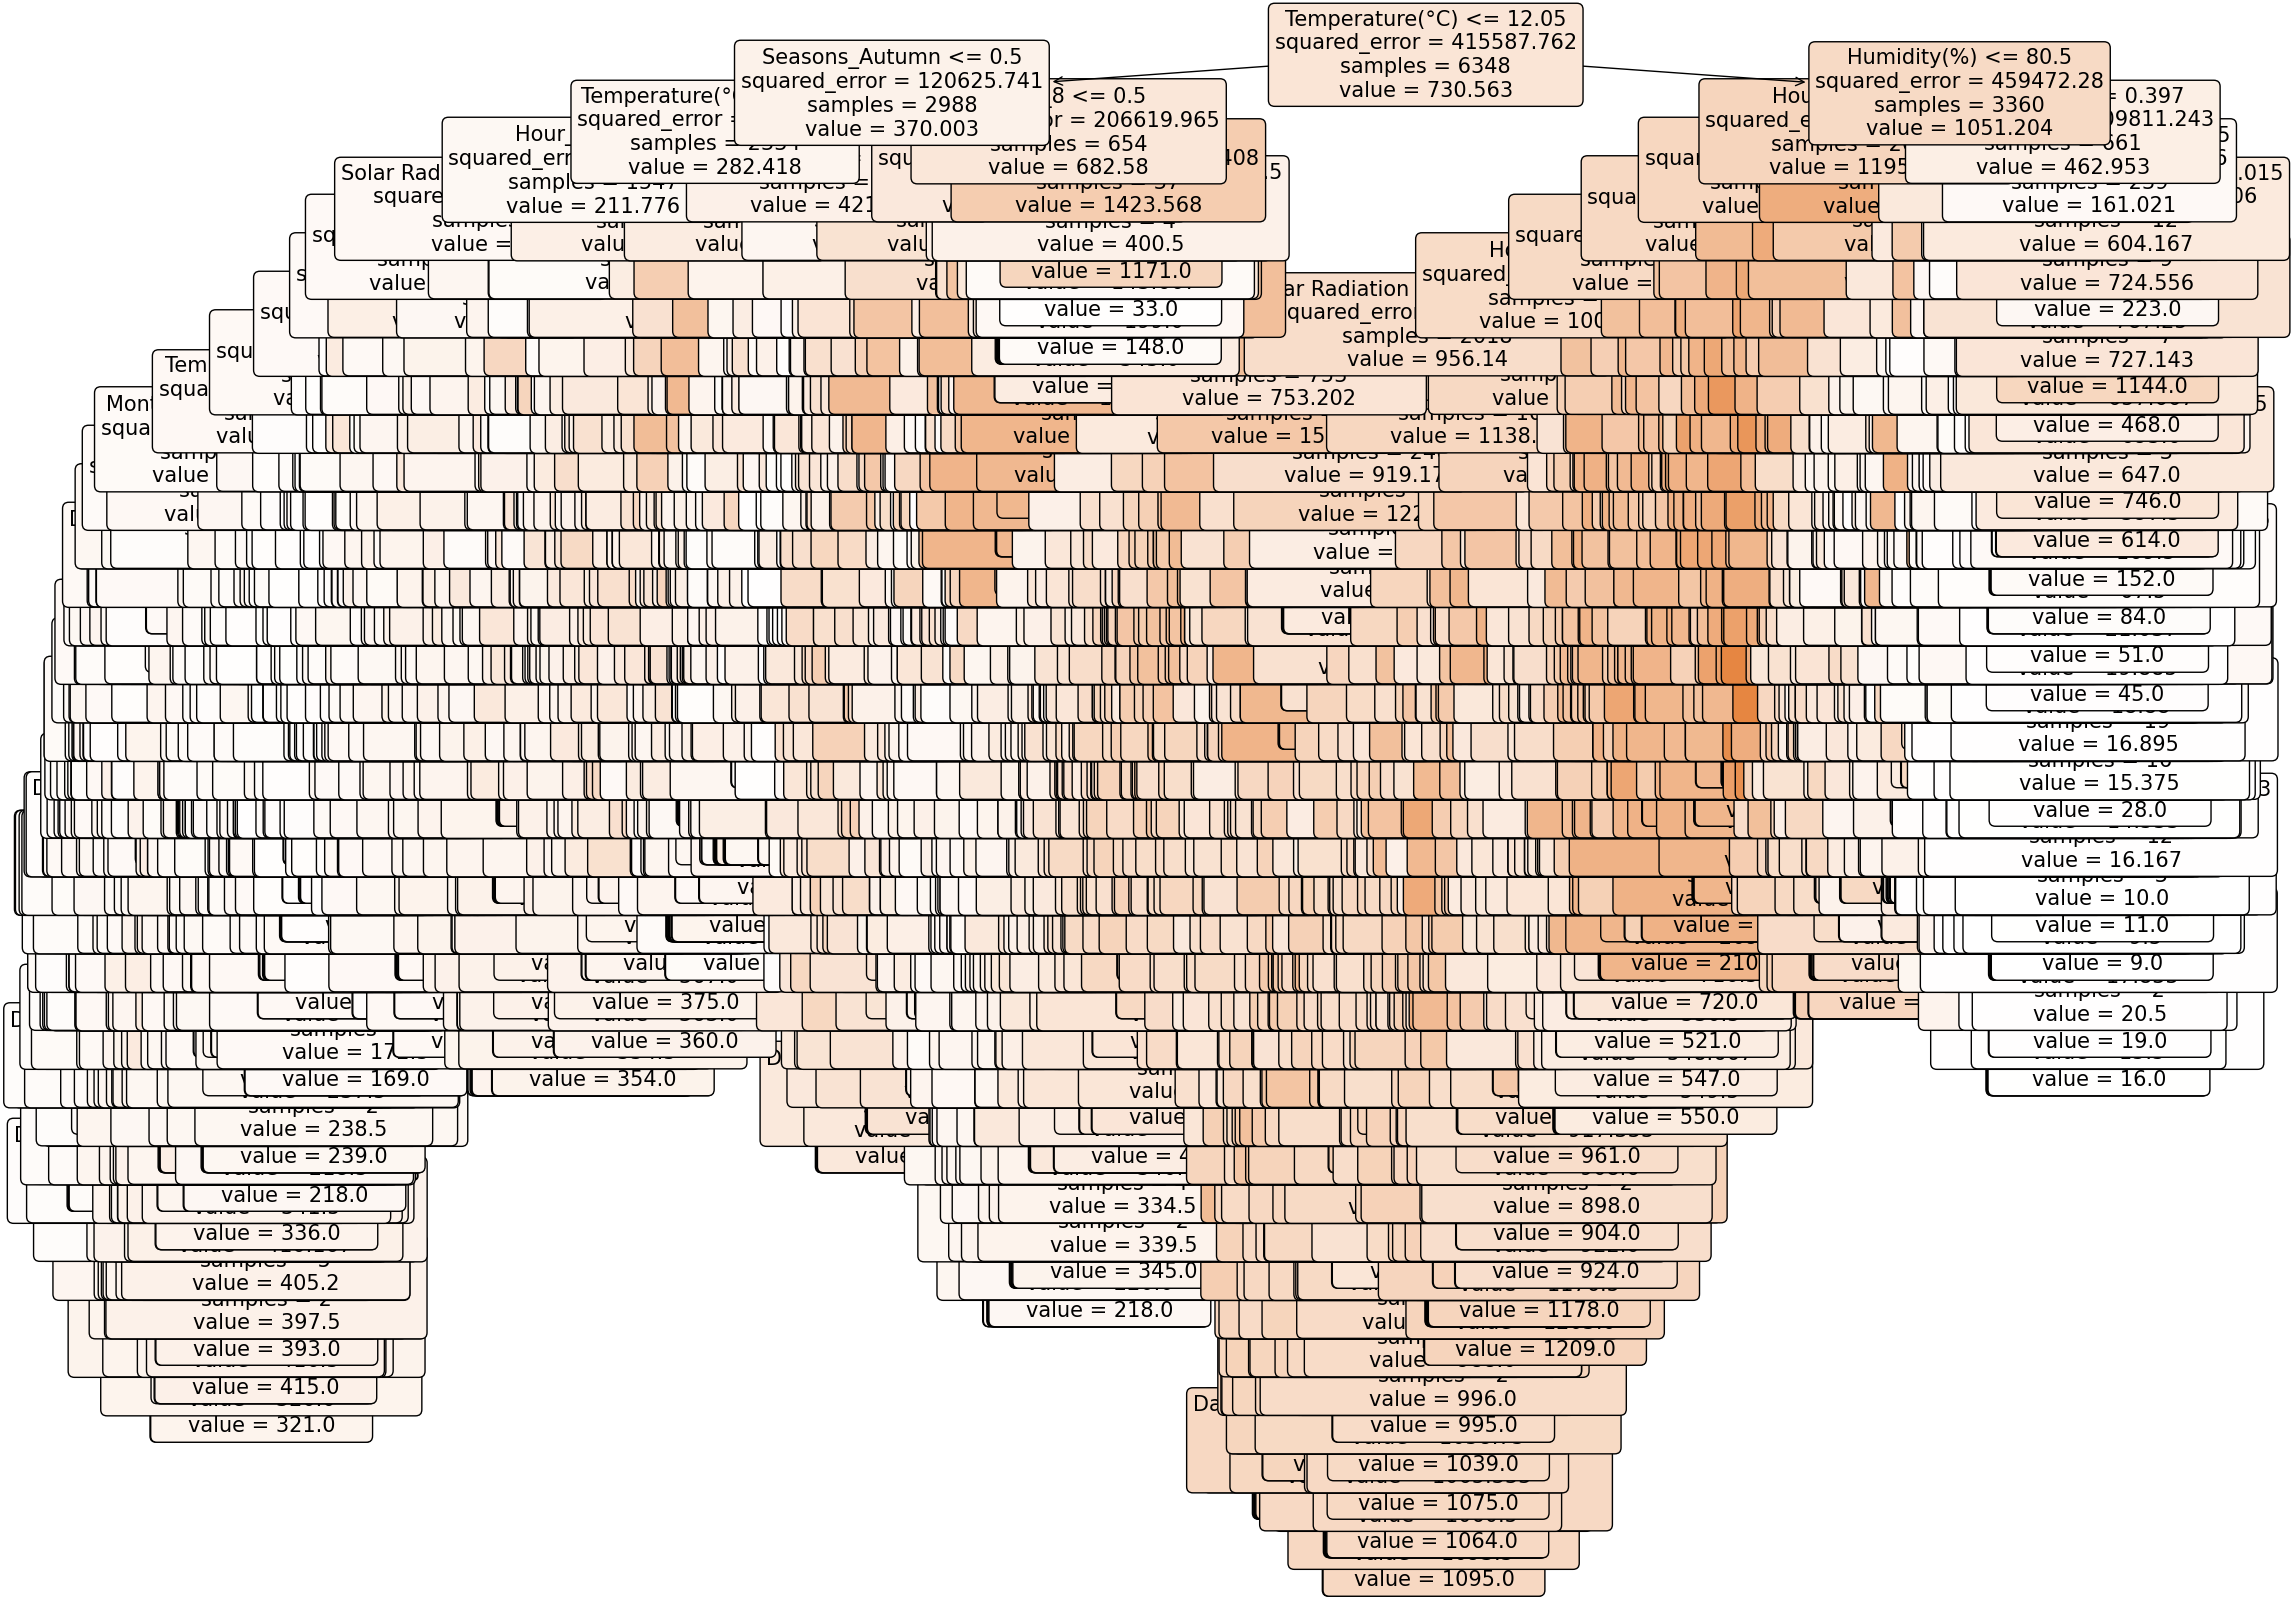

In [ ]:
# Visualizing the tree
plt.figure(figsize=(25,20))
plot_tree(regressor_dt, feature_names = independent_var, filled = True, rounded = True, fontsize = 15)
plt.show()

The tree has overfit and the visualization is very clumsy. Before proceeding with predicting with test data, we see the attributes of this tree.

In [ ]:
# get default tree parameters
regressor_dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
print('Depth of Tree: ',regressor_dt.get_depth())

Depth of Tree:  39


In [ ]:
print('Number of leaf nodes: ',regressor_dt.get_n_leaves())

Number of leaf nodes:  6255


The tree has overgrown upto 39 depth levels and has 6255 leaf nodes as the default parameters have no limit on depth and leaf nodes, and the tree splits until a node has minimum of 2 samples.

In [ ]:
# metric for predictions on train data
y_pred_train = regressor_dt.predict(X_train)
print('Training Accuracy of Decision Tree')
{'MSE':mean_squared_error(y_train,y_pred_train),'RMSE':np.sqrt(mean_squared_error(y_train,y_pred_train)),'MAE':mean_absolute_error(y_train,y_pred_train),
                  'R-squared':r2_score(y_train, y_pred_train),'Adjusted R-squared':1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))}

Training Accuracy of Decision Tree


{'MSE': 0.0,
 'RMSE': 0.0,
 'MAE': 0.0,
 'R-squared': 1.0,
 'Adjusted R-squared': 1.0}

Now we predict the output for testing data using the tree created.

In [ ]:
# making predictions on test dataset
y_pred_dt = regressor_dt.predict(X_test)

In [ ]:
# comparing the predicted and actual test values
y_test[:10], y_pred_dt[:10]

(      Rented Bike Count
 651                  86
 6951                222
 1815                461
 989                  42
 1916                213
 6745               1001
 44                  359
 1270                170
 5224               1635
 3534                427,
 array([  62.,  304.,  582.,   45.,  232., 1056.,  461.,  140., 1462.,
         464.]))

In [ ]:
# performance of decision tree
metric_df.iloc[4] = [mean_squared_error(y_test,y_pred_dt),np.sqrt(mean_squared_error(y_test,y_pred_dt)),mean_absolute_error(y_test,y_pred_dt),
                  r2_score(y_test, y_pred_dt),1-(1-r2_score((y_test), (y_pred_dt)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))]

In [ ]:
metric_df.iloc[4]

Mean Squared Error         79693.313179
Root Mean Squared Error      282.300041
Mean Absolute Error           163.98205
R-squared score                0.802486
Adjusted R-squared             0.797215
Name: Decision Tree, dtype: object

#### Cross Validation and Hyper-parameter tuning

Now we create another decision tree and we tune the hyperparameters to avoid overfitting and try to improve the predictions. Hyperparameter tuning is the process of optimizing the hyperparameters of a machine learning algorithm in order to improve its performance on a given task.

Here, we use GridsearchCV. GridSearchCV is a hyperparameter tuning technique that is commonly used to improve the performance of machine learning models. It is a method of systematically searching over a specified hyperparameter space to find the best combination of hyperparameters that optimizes a given metric (here negative mean squared error) for a given model.

In [ ]:
# setting the values for hyperparameters out of which the GridSearchCV will run the model for best estimator
parameters={'max_leaf_nodes':[50,100,150,200,250,500,750,1000,1250,1500,2000],'min_samples_split':[5,10,20,30,40,50]}
dt=DecisionTreeRegressor()
# using the above range of parameters for decision tree and negative mean square error as the scoring method and 5 fold cross-validation
regressor_dt2 = GridSearchCV(dt, parameters, scoring='neg_mean_squared_error',cv=5)

In [ ]:
# fitting on training set
regressor_dt2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': [50, 100, 150, 200, 250, 500, 750,
                                            1000, 1250, 1500, 2000],
                         'min_samples_split': [5, 10, 20, 30, 40, 50]},
             scoring='neg_mean_squared_error')

In [ ]:
# estimator with the best performance
regressor_dt2.best_estimator_

DecisionTreeRegressor(max_leaf_nodes=1500, min_samples_split=20)

In [ ]:
print('Depth of Tree: ',regressor_dt2.best_estimator_.get_depth())

Depth of Tree:  31


In [ ]:
print('Number of leaf nodes: ',regressor_dt2.best_estimator_.get_n_leaves())

Number of leaf nodes:  744


The depth of tree chosen as best estimator has reduced from 39 to 31 and the number of leaf nodes has reduced from 6255 to 744.

In [ ]:
# metric for predictions on train data
y_pred_train = regressor_dt2.predict(X_train)
print('Training Accuracy of Tuned Decision Tree')
{'MSE':mean_squared_error(y_train,y_pred_train),'RMSE':np.sqrt(mean_squared_error(y_train,y_pred_train)),'MAE':mean_absolute_error(y_train,y_pred_train),
                  'R-squared':r2_score(y_train, y_pred_train),'Adjusted R-squared':1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))}

Training Accuracy of Tuned Decision Tree


{'MSE': 24080.224911204958,
 'RMSE': 155.1780426194536,
 'MAE': 93.11430670021002,
 'R-squared': 0.9420574253843961,
 'Adjusted R-squared': 0.9415509343475463}

In [ ]:
# making predictions on test dataset
y_pred_dt2 = regressor_dt2.predict(X_test)

In [ ]:
# comparing the predicted and actual test values
y_test[:10],y_pred_dt2[:10]

(      Rented Bike Count
 651                  86
 6951                222
 1815                461
 989                  42
 1916                213
 6745               1001
 44                  359
 1270                170
 5224               1635
 3534                427,
 array([  66.86666667,  294.72727273,  726.        ,   43.        ,
         208.83333333,  971.        ,  504.7       ,  144.91666667,
        1417.09090909,  569.        ]))

In [ ]:
# performance of tuned decision tree
metric_df.iloc[5] = [mean_squared_error(y_test,y_pred_dt2),np.sqrt(mean_squared_error(y_test,y_pred_dt2)),mean_absolute_error(y_test,y_pred_dt2),
                  r2_score(y_test, y_pred_dt2),1-(1-r2_score((y_test), (y_pred_dt2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))]

In [ ]:
metric_df.iloc[5]

Mean Squared Error         71891.259724
Root Mean Squared Error      268.125455
Mean Absolute Error          157.206708
R-squared score                0.821823
Adjusted R-squared             0.817068
Name: Tuned Decision Tree, dtype: object

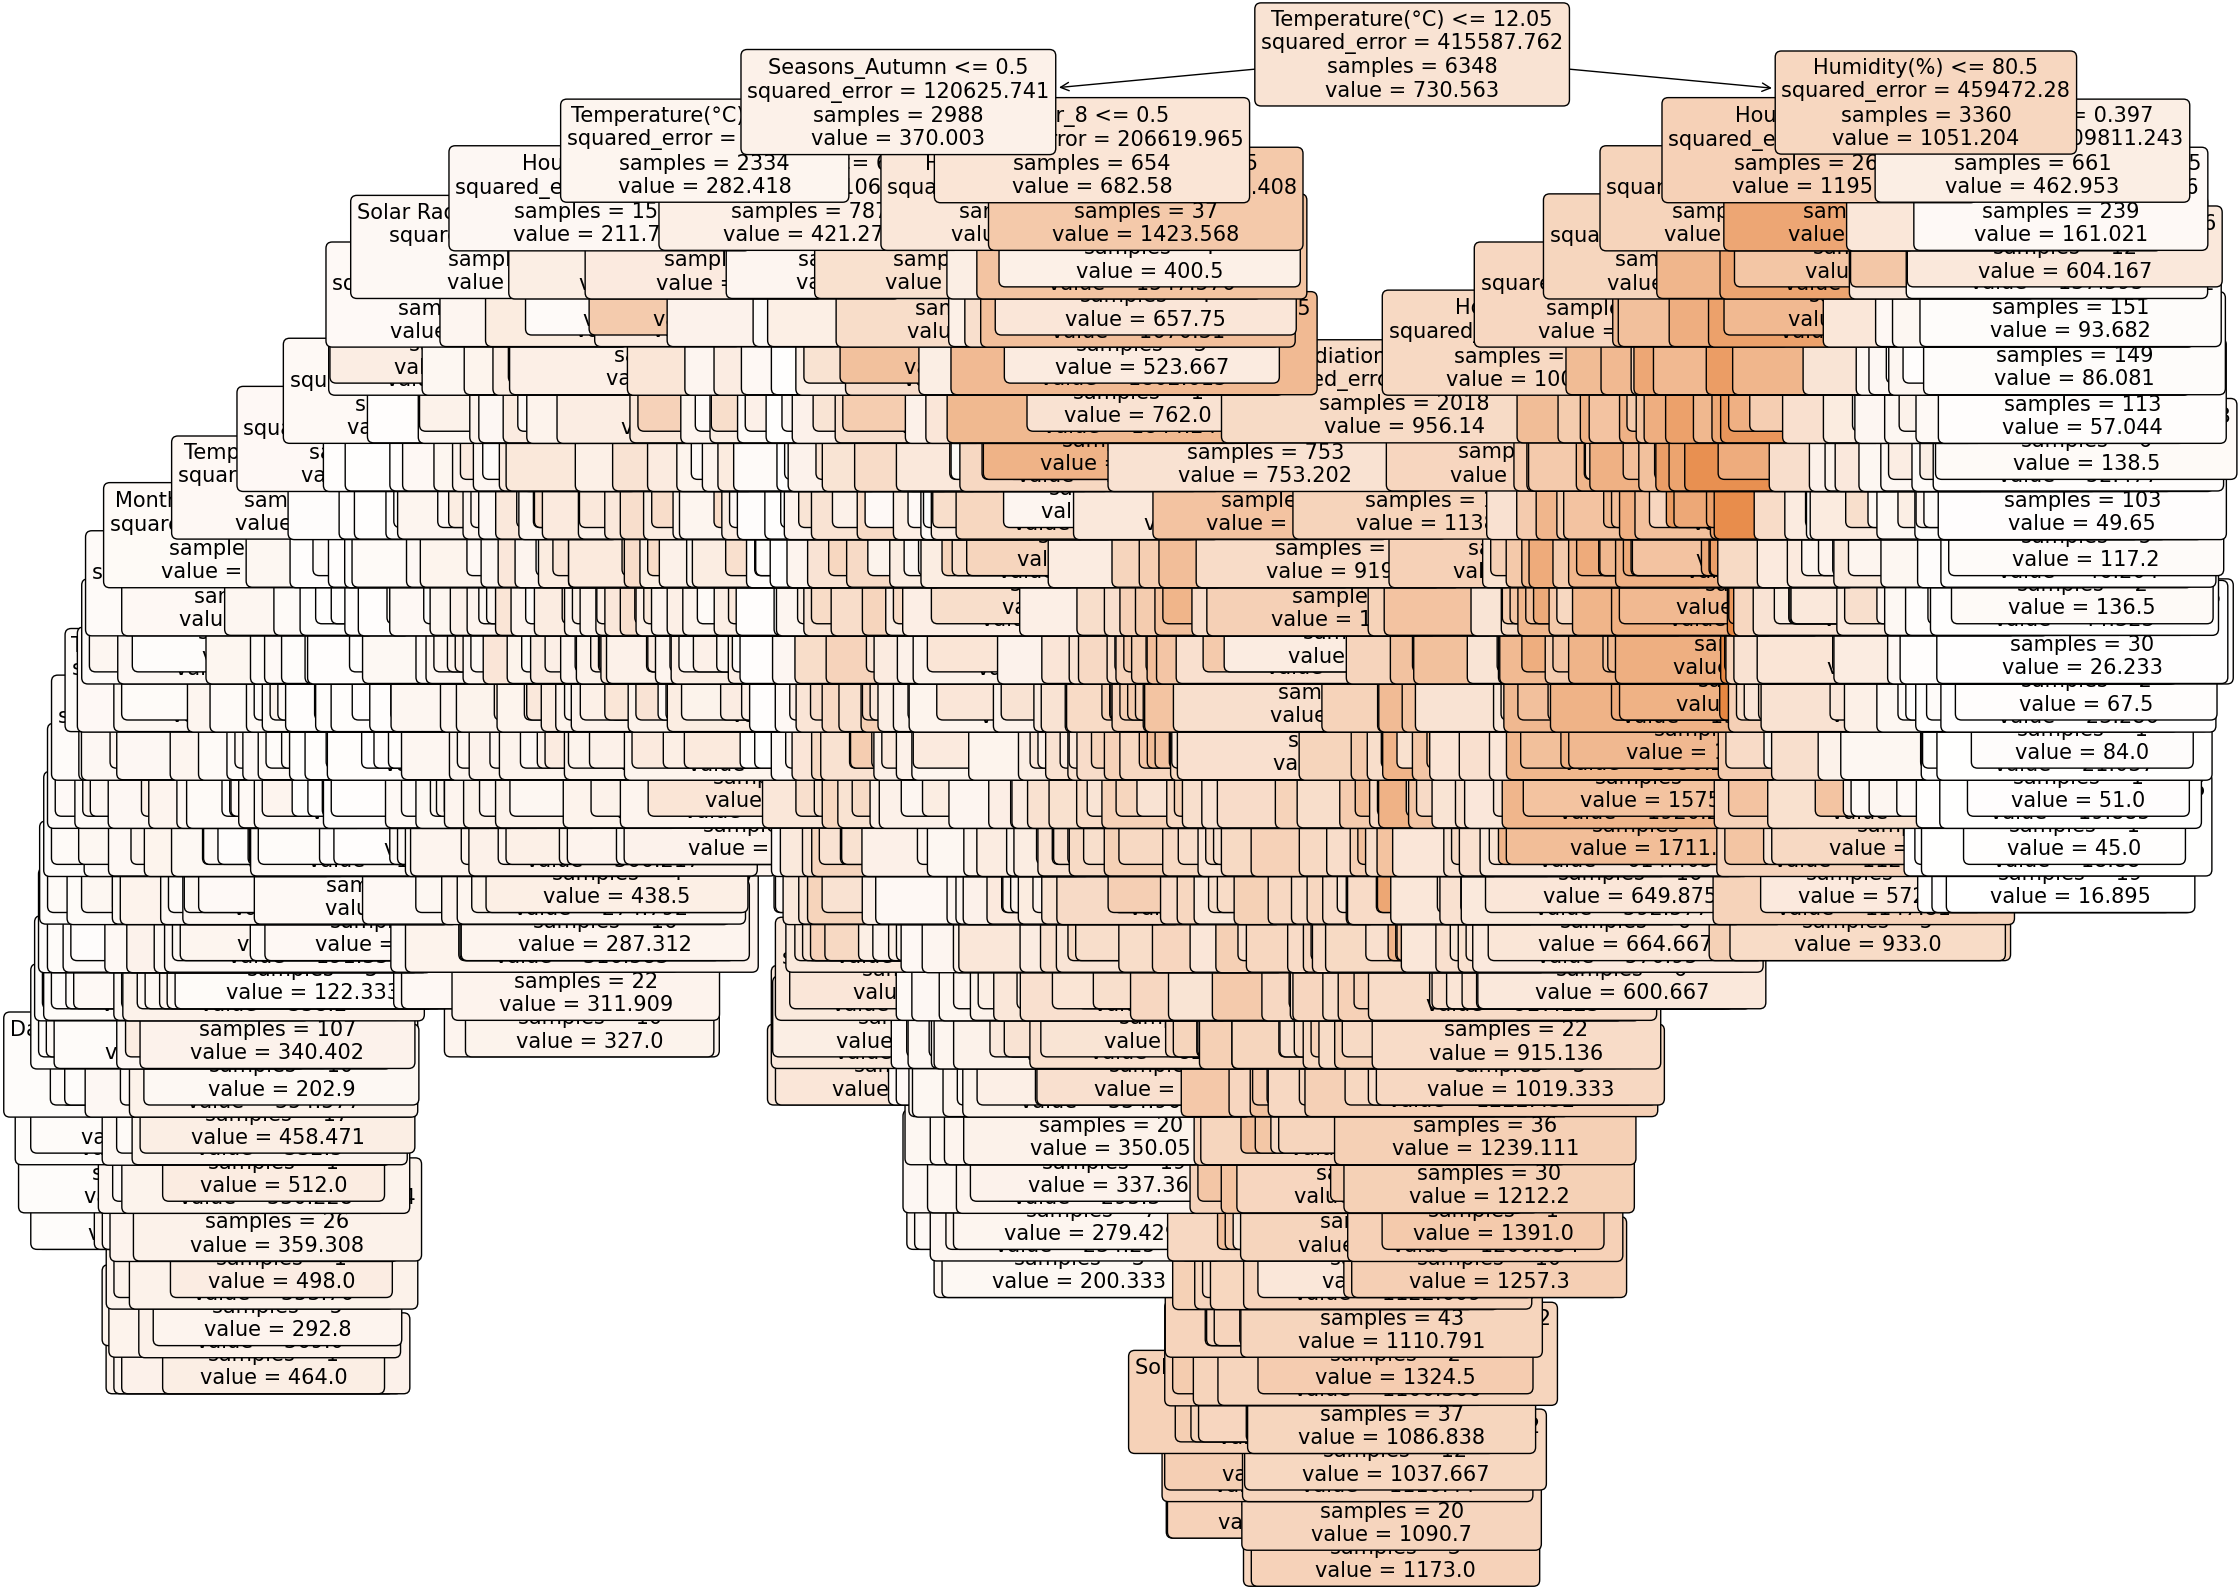

In [ ]:
# visualizing tree
plt.figure(figsize=(25,20))
plot_tree(regressor_dt2.best_estimator_, feature_names = independent_var, filled = True, rounded = True, fontsize = 15)
plt.show()

**INFERENCE:** The decision tree which was let to overfit describes 78.79% of variation in the data with RMSE of 288 and MAE of 165. This overfitted tree has zero error in making training predictions. As we pruned the tree to prevent overfitting by controlling the hyperparameters, where training accuracy decreased, we improved our predictions to some extent as evident from the metrics. The pruned decision tree describes 81.89% of variation in data and the RMSE reduced to 266 and MAE reduced to 156. So tuned decision tree is preferred over regular decision tree.


### ML Model 3 - Random Forest

Implementing Random Forest model which uses multiple decision trees and see if it performs better than single decision tree.

In [ ]:
# Random Forest model created
regressor_rf = RandomForestRegressor()
# model fit to train data
regressor_rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# predicting test data
y_pred_rf = regressor_rf.predict(X_test)

In [ ]:
# performance of random forest
metric_df.iloc[6] = [mean_squared_error(y_test,y_pred_rf),np.sqrt(mean_squared_error(y_test,y_pred_rf)),mean_absolute_error(y_test,y_pred_rf),
                  r2_score(y_test, y_pred_rf),1-(1-r2_score((y_test), (y_pred_rf)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))]

In [ ]:
metric_df.iloc[6]

Mean Squared Error         46848.547078
Root Mean Squared Error      216.445252
Mean Absolute Error          126.299017
R-squared score                0.883889
Adjusted R-squared             0.880791
Name: Random Forest, dtype: object

#### Cross validation and hyperparameter tuning

Random Forest is a combination of multiple trees and it prevents overfitting which is a main drawback of decision trees. Still, we can check if tuning a random forest will improve the predictions or not using GridsearchCV.

In [ ]:
# setting the values for hyperparameters out of which the GridSearchCV will run the model for best estimator
parameters = {'n_estimators':[50,150,200,250,300,400,500],'min_samples_split': [2,10,50,80]}
rf=RandomForestRegressor()
# using the above range of parameters for random forest and negative mean square error as the scoring method and 5 fold cross-validation
regressor_rf2 = GridSearchCV(rf, parameters, scoring='neg_mean_squared_error',cv=5)

In [ ]:
# fitting on training set
regressor_rf2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'min_samples_split': [2, 10, 50, 80],
                         'n_estimators': [50, 150, 200, 250, 300, 400, 500]},
             scoring='neg_mean_squared_error')

In [ ]:
# estimator with the best performance
regressor_rf2.best_estimator_

RandomForestRegressor(n_estimators=400)

In [ ]:
# predicting test data
y_pred_rf2 = regressor_rf2.predict(X_test)

In [ ]:
# comparing predicted and test values
y_pred_rf2[:10],y_pred_rf,y_test[:10]

(array([  82.1075,  473.47  ,  486.3425,   48.525 ,  233.8025,  933.185 ,
         394.495 ,  154.125 , 1520.7775,  335.3875]),
 array([  80.43,  503.5 ,  463.69, ..., 1209.97,  531.23,  297.36]),
       Rented Bike Count
 651                  86
 6951                222
 1815                461
 989                  42
 1916                213
 6745               1001
 44                  359
 1270                170
 5224               1635
 3534                427)

In [ ]:
# performance of random forest with 400 decision trees
metric_df.iloc[7] = [mean_squared_error(y_test,y_pred_rf2),np.sqrt(mean_squared_error(y_test,y_pred_rf2)),mean_absolute_error(y_test,y_pred_rf2),
                  r2_score(y_test, y_pred_rf2),1-(1-r2_score((y_test), (y_pred_rf2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))]

In [ ]:
metric_df.iloc[7]

Mean Squared Error         45990.34088
Root Mean Squared Error     214.453587
Mean Absolute Error         124.886783
R-squared score               0.886016
Adjusted R-squared            0.882975
Name: Tuned Random Forest, dtype: object

**INFERENCE:** Random Forest model has performed very well explaining more than 88% of variation in the data, more than tuned decision tree. RMSE and MAE have also decreased to 216 and 125 respectively. Here, we also tune the hyperparameters of the random forest, however it is not preferable to tune the hyperparameters of random forest as performance wise, there is very little improvement but it is too time consuming to tune the hyperparameters.


### ML Model 4 - XGBoost

Implementing XGBoost model which is another variation of Gradient Boosting.

In [ ]:
# XGBoost model created
regressor_xgb = XGBRegressor()

In [ ]:
# model fit to train data
regressor_xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# making predictions on test data
y_pred_xgb = regressor_xgb.predict(X_test)

In [ ]:
# comparing predicted and test values
y_pred_xgb[:10],y_test[:10]

(array([  62.573315 ,  525.6225   ,  511.28806  ,   -3.1518748,
         209.49937  ,  907.7891   ,  429.59332  ,  198.60902  ,
        1537.9675   ,  356.9194   ], dtype=float32),
       Rented Bike Count
 651                  86
 6951                222
 1815                461
 989                  42
 1916                213
 6745               1001
 44                  359
 1270                170
 5224               1635
 3534                427)

In [ ]:
# performance of XGBoost model
metric_df.iloc[8] = [mean_squared_error(y_test,y_pred_xgb),np.sqrt(mean_squared_error(y_test,y_pred_xgb)),mean_absolute_error(y_test,y_pred_xgb),
                  r2_score(y_test, y_pred_xgb),1-(1-r2_score((y_test), (y_pred_xgb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))]

In [ ]:
metric_df.iloc[8]

Mean Squared Error         36930.626486
Root Mean Squared Error      192.173428
Mean Absolute Error          119.639495
R-squared score                 0.90847
Adjusted R-squared             0.906028
Name: XGBoost, dtype: object

####  Cross- Validation & Hyperparameter Tuning

Using GridSearchCV to tune the hyperparameters.

In [ ]:
# HYperparameter Grid
param_dict = {'n_estimators' : [50,80,100], 'max_depth' : [4,6,8]}
xg_model = XGBRegressor()

# Fit the Algorithm
# Grid search
xg_grid = GridSearchCV(estimator=xg_model, param_grid = param_dict, cv = 5, scoring='neg_mean_squared_error')

xg_grid1=xg_grid.fit(X_train,y_train)
# Predict on the model
# Making predictions on train and test data

y_pred_xg2 = xg_grid1.predict(X_test)

In [ ]:
# performance of random forest with 400 decision trees
metric_df.iloc[9] = [mean_squared_error(y_test,y_pred_xg2),np.sqrt(mean_squared_error(y_test,y_pred_xg2)),mean_absolute_error(y_test,y_pred_xg2),
                  r2_score(y_test, y_pred_xg2),1-(1-r2_score((y_test), (y_pred_xg2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))]

In [ ]:
metric_df.iloc[9]

Mean Squared Error         36648.267679
Root Mean Squared Error      191.437373
Mean Absolute Error           118.27188
R-squared score                 0.90917
Adjusted R-squared             0.906746
Name: Tuned XGBoost, dtype: object

**INFERENCE:** XGBoost has also performed excellently well, explaining more than 90% of variation in data. RMSE and MAE are also at lowest values of 192 and 119 respectively.

After Hyperparameter tuning, we can see a slight rise in R-squared score, however this is not worth in expense of computation and time. 

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We have used the adjusted R-squared score as our primary evaluation metric. The R-squared score is an important metric in linear regression analysis as it provides an indication of how well the model fits the data. Specifically, it measures the proportion of the variation in the dependent variable that is explained by the independent variables in the model. An R-squared score of 1 indicates that the model perfectly fits the data, meaning that all the variation in the dependent variable can be explained by the independent variables in the model. On the other hand, an R-squared score of 0 indicates that the model does not fit the data at all, and there is no relationship between the dependent variable and the independent variables in the model. However, R-squared alone does not account for the number of independent variables in the model, which can lead to overestimation of the model's performance. 

The adjusted R-squared score addresses this issue by penalizing models that include unnecessary predictors. The adjusted R-squared score is a useful metric for comparing the performance of different models with different numbers of predictors, as it provides a fair comparison of model fit while accounting for the number of predictors in the model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

XGBoost model is chosen as the final prediction model. By observing the evaluation metrics for all models implemented, its pretty obvious to choose XGBoost model as it has the highest Adjusted R-squared score (more than 90%) and lowest Mean Errors (MSE, RMSE, MAE). However the decision to choose between hyperparameter tuned XGBoost or regular XGBoost will lie with the user. 

In [ ]:
metric_df[8:10]

Mean Squared Error Root Mean Squared Error Mean Absolute Error  \
XGBoost             36930.626486              192.173428          119.639495   
Tuned XGBoost       36648.267679              191.437373           118.27188   

              R-squared score Adjusted R-squared  
XGBoost               0.90847           0.906028  
Tuned XGBoost         0.90917           0.906746

Both XGBoost and tuned XGBoost have almost similar evaluation metric values. Tuned XGBoost performed slightly better than regular XGBoost with Adjusted R-squared 90.67% compared to 90.60% and RMSE 191.43 compared to 192.17. However, tuning is computationally expensive and also time consuming. So its recommended to use regular XGBoost, but if user can afford computation expenses and time, then they can use tuned XGBoost.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

SHAP (SHapley Additive exPlanations) is an explainability tool for machine learning models that provides a unified way to interpret model predictions. SHAP measures the contribution of each feature to a prediction by considering all possible combinations of features and their values.

In [ ]:
#Get shap values
explainer = shap.Explainer(regressor_xgb)
shap_values = explainer(X_test) 
shap_values

.values =
array([[-395.49405  ,   47.349297 ,   -7.093229 , ...,  -11.691855 ,
         -10.291533 ,   -4.1960955],
       [ 250.24911  , -377.4033   ,   11.320591 , ...,   -8.342347 ,
         -11.773012 ,   -6.764129 ],
       [-195.40224  ,   94.319466 ,  -29.340427 , ...,  -12.68729  ,
          -9.54001  ,   -0.9491322],
       ...,
       [ 412.06625  ,  130.2247   ,   -4.70423  , ...,  -22.963102 ,
         -17.375616 ,   -5.002647 ],
       [  24.272266 ,  -47.899216 ,   12.045969 , ...,  -20.429415 ,
         -25.313545 ,  -12.479714 ],
       [-575.5945   ,   64.26949  ,   -3.714961 , ...,  -11.086136 ,
          -8.883589 ,   -4.358266 ]], dtype=float32)

.base_values =
array([730.60046, 730.60046, 730.60046, ..., 730.60046, 730.60046,
       730.60046], dtype=float32)

.data =
array([[-6. , 32. ,  2.5, ...,  0. ,  0. ,  0. ],
       [23.2, 83. ,  1.5, ...,  0. ,  0. ,  0. ],
       [ 8.7, 48. ,  4.1, ...,  0. ,  0. ,  0. ],
       ...,
       [23.7, 43. ,  2.8, ...,  0. ,  

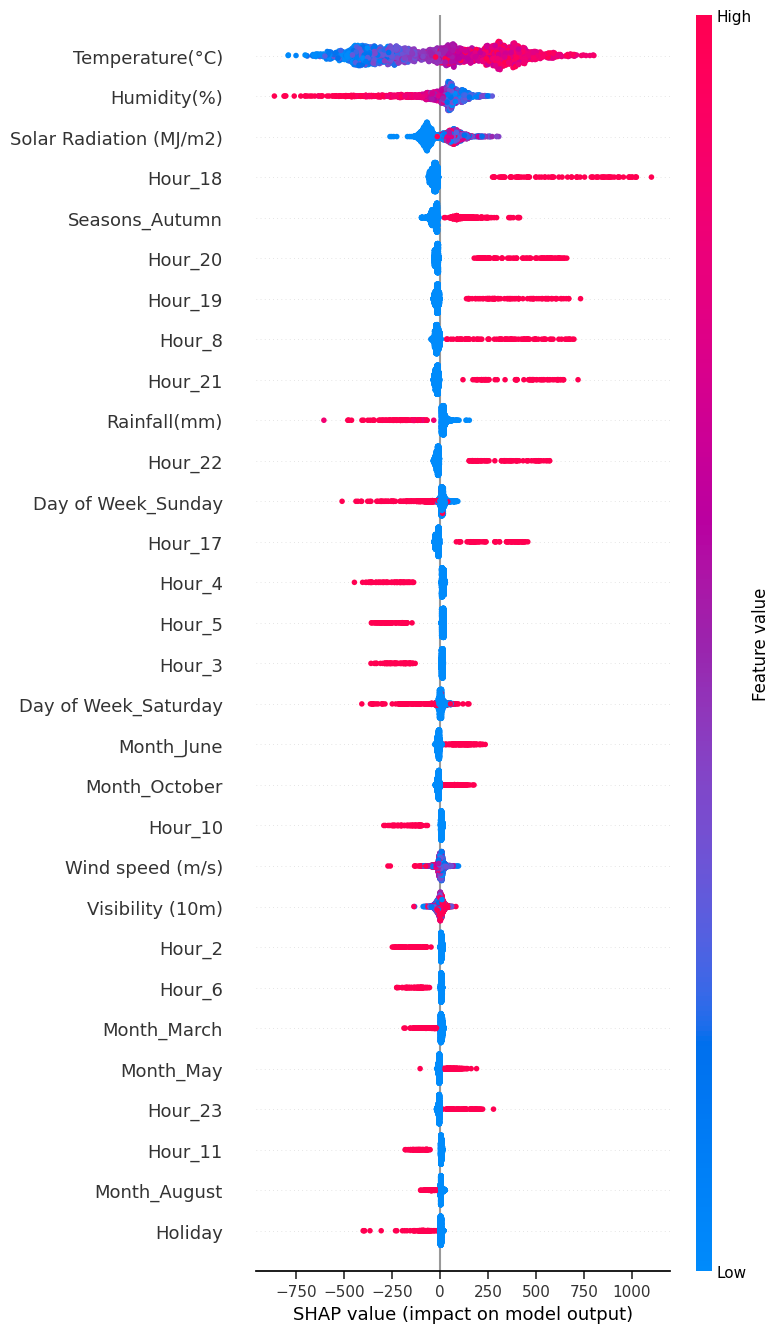

In [ ]:
# summary plot for shap
shap.summary_plot(shap_values, X_test,feature_names=X_test.columns,max_display=30)

The summary plot in SHAP (SHapley Additive exPlanations) is a type of global plot that provides a visual representation of the impact of each feature on the model output across the entire dataset. The summary plot consists of a horizontal bar chart that shows the SHAP value for each input feature. The SHAP value represents the contribution of each feature to the difference between the expected model output and the actual model output for a given observation. Positive SHAP values indicate that the feature is positively correlated with the model output, while negative SHAP values indicate a negative correlation.

The summary plot also displays the distribution of the SHAP values for each feature. The height of each bar represents the total impact of the feature on the model output, while the color of the bar indicates the value of the feature. Red bars indicate high feature values for output, while blue bars indicate low feature values for output. For example, decreasing the humidity or rainfall increases the rental bike count and increasing the temperature increases the rental bike count.  

 By analyzing the summary plot, we can gain insights into the following:

 1. *Feature importance:* The summary plot helps us understand the relative importance of each feature in the model. Features with a larger total impact on the model output are more important than features with a smaller impact.

 In this plot, we can see that temperature is the most important feature for the machine learning model, as it is shown at the top of the y-axis. Other features, such as humidity, Solar Radiation, and Hour_18, also have relatively high importance, while features such as Month_October and Hour_10 have relatively low importance.

 2. *Feature directionality:* The color of each bar in the summary plot represents the direction of the feature. This can help us understand whether a feature is positively or negatively correlated with the model output.

 In this plot, we can see that the impact of some features, such as Temperature and Hour_18, is positive, meaning that increasing the value of these features leads to an increase in the model's output. Other features, such as Rainfall and Day_of_week_Sunday, have a negative impact, meaning that increasing the value of these features leads to a decrease in the model's output. Finally, there are some features, such as visibility, that have a neutral impact, meaning that they do not affect the model's output.

 3. *Feature interaction:* The summary plot can help us identify interactions between features that impact the model output. If two features have a similar impact on the model output, it may indicate that they are correlated or that they interact with each other in some way.

 In this plot, the x-axis represents the SHAP value, which is a measure of the magnitude and direction of the impact of each feature on the model output. The y-axis represents the input features in the model, ranked by their relative importance.
 
 We can see that some features have a similar impact on the model output, such as Temperature and Hour_18, even though their relative importance is different. This suggests that there may be an interaction between these two features. 

## Conclusion

In [ ]:
metric_df

Mean Squared Error  \
Linear Regression                              117932.102031   
Lasso Regularized Linear Regression            118316.424389   
Ridge Regularized Linear Regression            118348.181988   
Elastic Net Regularized Linear Regression      118332.436022   
Decision Tree                                   79693.313179   
Tuned Decision Tree                             71891.259724   
Random Forest                                   46848.547078   
Tuned Random Forest                              45990.34088   
XGBoost                                         36930.626486   
Tuned XGBoost                                   36648.267679   

                                          Root Mean Squared Error  \
Linear Regression                                      343.412437   
Lasso Regularized Linear Regression                    343.971546   
Ridge Regularized Linear Regression                    344.017706   
Elastic Net Regularized Linear Regression               343.99482   
Decision Tree                                          282.300041   
Tuned Decision Tree                                    268.125455   
Random Forest                                          216.445252   
Tuned Random Forest                                    214.453587   
XGBoost                                                192.173428   
Tuned XGBoost                                          191.437373   

                                          Mean Absolute Error R-squared score  \
Linear Regression                                  261.213037        0.707714   
Lasso Regularized Linear Regression                 261.46467        0.706762   
Ridge Regularized Linear Regression                261.487901        0.706683   
Elastic Net Regularized Linear Regression          261.485914        0.706722   
Decision Tree                                       163.98205        0.802486   
Tuned Decision Tree                                157.206708        0.821823   
Random Forest                                      126.299017        0.883889   
Tuned Random Forest                                124.886783        0.886016   
XGBoost                                            119.639495         0.90847   
Tuned XGBoost                                       118.27188         0.90917   

                                          Adjusted R-squared  
Linear Regression                                   0.699914  
Lasso Regularized Linear Regression                 0.698936  
Ridge Regularized Linear Regression                 0.698856  
Elastic Net Regularized Linear Regression           0.698896  
Decision Tree                                       0.797215  
Tuned Decision Tree                                 0.817068  
Random Forest                                       0.880791  
Tuned Random Forest                                 0.882975  
XGBoost                                             0.906028  
Tuned XGBoost                                       0.906746

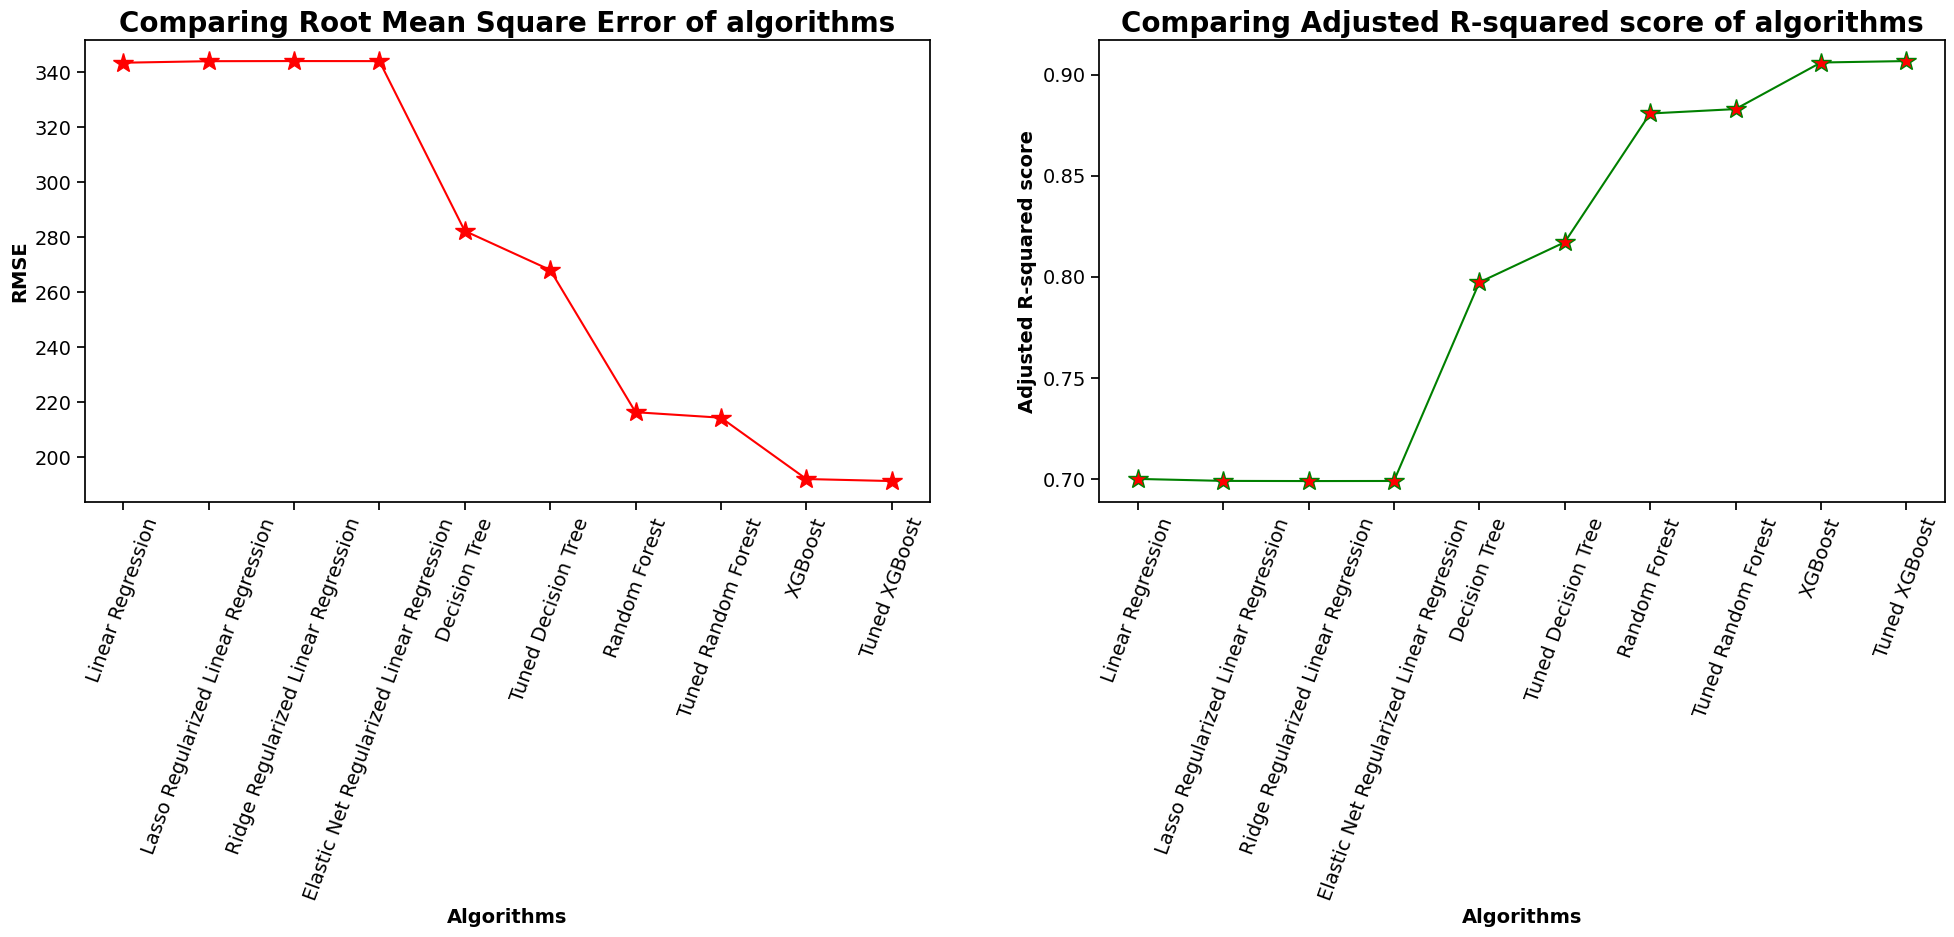

In [ ]:
# plotting RMSE and adjusted R-squared for all the models
plt.figure(figsize = (24,6))
plt.subplot(121)
ax = metric_df['Root Mean Squared Error'].plot(fontsize = 14,color = 'red',marker = '*', mfc = 'r', ms = 15)
plt.title('Comparing Root Mean Square Error of algorithms', fontsize = 20, fontweight='bold')
plt.xlabel('Algorithms', fontsize = 14, fontweight='bold')
plt.ylabel('RMSE', fontsize = 14, fontweight='bold')
plt.xticks(rotation=70)
ax.set_xticks(range(0,len(metric_df.index)),metric_df.index)
plt.subplot(122)
ax2 = metric_df['Adjusted R-squared'].plot(fontsize = 14,color = 'green',marker = '*', mfc = 'r', ms = 15)
plt.title('Comparing Adjusted R-squared score of algorithms', fontsize = 20, fontweight='bold')
plt.xlabel('Algorithms', fontsize = 14, fontweight='bold')
plt.ylabel('Adjusted R-squared score', fontsize = 14, fontweight='bold')
plt.xticks(rotation=70)
ax2.set_xticks(range(0,len(metric_df.index)),metric_df.index)
plt.show()

1. Xgboost model performs the best regression on the data explaining more than 90% of the variation in the data, followed by Random Forest which explains around 88% of the variations in the data. Decision Tree and Gradient Boosting performed descently explaining around 82% variation in the data. Linear Regression along with all regularization techniques failed to perform well.

2. Most of the algorihtms consider Temperature as the most important feature according to their feature importance plot. However, the best performing algorithm (XGBoost) considers the evening hour variables as the most important feature. Further XGBoost is the only algorithm which has given such a less (15%) importance to its most important feature whereas other algorithms have more than 35% importance to its most important features. Another thing to note is that XGBoost's feature importance plot is fairly distributed meaning the lowest important features have also been given importance. 

3. From EDA we conclude that, people rent bikes mostly on working days, mainly during the office hours of morning and evening hours as it touches peak in around 6 PM. People avoided using bikes in winter and summer had most bikes rented with peak in the month of June.

Finally, we can conclude that in predicting the rental bike count, its important to focus on the time of booking and the weather condition. Most of the bookings done during the office hours, particulary evenings, that too on weekdays. However, if the weather is chilly or rainy or snowy, bookings will be low and so less bookings in winter season during the months of December, January and February. 